## Post process analysis
- Load the turn by turn data
- Emittance evolution 
- Phase space evolution, at the turns of interest

In [1]:
import os
import sys
import numpy as np
from math import *
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import PyNAFF as pnf
sys.path.append('./utils')
from my_functions import *

### Plotting parameters

In [2]:
params = {'legend.fontsize': 16,
          'figure.figsize': (8.5, 6.5),
          'axes.labelsize': 18,
          'axes.titlesize': 18,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Study parameters

In [3]:
f_rev = 11.2455e3  # revolution frequency [Hz]
# Relativistic parameters
gamma_rel = 7460.52252807237 # from madx twiss
beta_rel = sqrt(1-(1/gamma_rel)**2)
# Twiss parameters
twiss = DottedDict()
twiss.beta_x = 115.75 #at IP3 #obtained from madx twiss. should be crossed check
twiss.beta_y = 1. 
twiss.alpha_x = 0 
twiss.alpha_y = 0 
twiss.gamma_x = (1+twiss.alpha_x**2)/twiss.beta_x
twiss.gamma_y = (1+twiss.alpha_y**2)/twiss.beta_y
ex_norm = 2.5e-6
ex_geom = ex_norm/(beta_rel*gamma_rel)
#ex_geom = 0.047#*1e-9 #for SCC
sigma_x = sqrt(twiss.beta_x*ex_geom)
sigma_px = sqrt(ex_geom/twiss.beta_x)
print(sigma_x, sigma_px)
particles = 15000
turns = 1000
file_name = 'oct5852.61_noise1.0_feedback0.2_betax115.75_H_particles15000_turns1000_aperture3e-2'
save_flag = False
Delta = 1.0#*sigma_px
gain = 0.2#*sigma_px
A =  3 #p.168
ksi = 0.03#*sigma_px

0.00019694541882215593 1.7014723008393603e-06


In [4]:
df = pd.read_pickle('./turn_by_turn_data/{}.pkl'.format(file_name))
#df = pd.read_pickle('./turn_by_turn_data/{}.pkl'.format(file_name))

### Emittance evolution 

In [5]:
e_x = [] # list for the values of geometric emittance over turns
for turn in range(turns):
    e_x.append(cmp_emit(df.at[turn,'x']/sqrt(twiss.beta_x), df.at[turn,'px']*sqrt(twiss.beta_x) ))

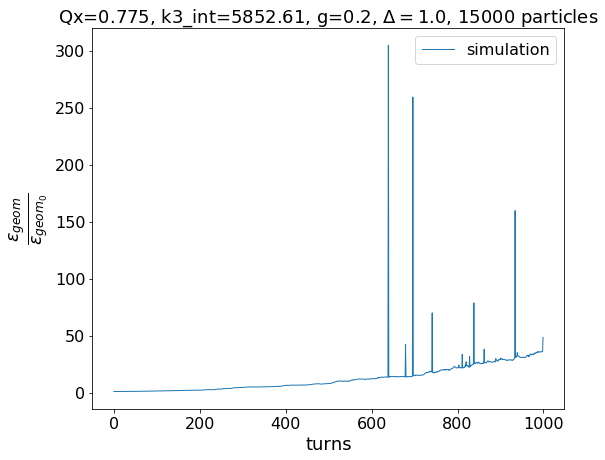

In [6]:
turns_list = np.arange(0,1000)
plt.plot(e_x/e_x[0], label = 'simulation')
plt.xlabel('turns')
plt.ylabel(r'$\frac{\epsilon_{geom}}{\epsilon_{geom_0}} $', fontsize = 25)
#plt.ylim(0, 40)
plt.title('Qx=0.775, k3_int=5852.61, g=0.2, '+r'$\Delta = 1.0$'+', 15000 particles')
plt.tight_layout()
plt.legend()
save_flag = False
if save_flag:
    plt.savefig('./figures/emittance_{}.png'.format(file_name))

### Losses 
- Plot the number of particles with value Nan per turn

In [7]:
lost_particles = [] # list with len(turns). Each element is the number of lost particles for the respective turn
for turn in range(turns):
    count_losses = 0 # just a counter to count the losses per turn
    for particle in range(particles):
        if isnan(df.at[turn, 'px'][particle]): # you can jsut check one of the coordinates, the rest will be Nan as well
            count_losses = count_losses + 1
    lost_particles.append(count_losses)

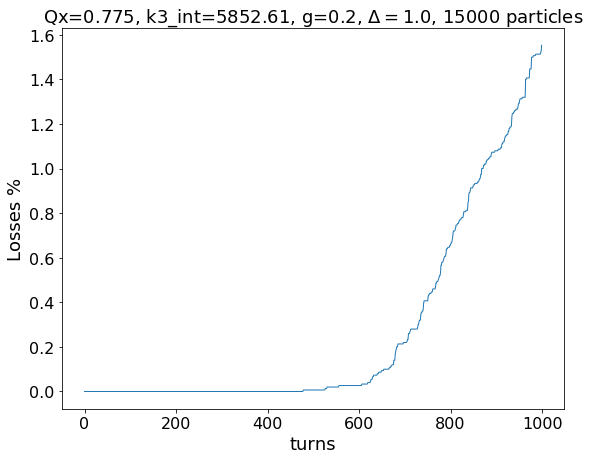

In [10]:
save_losses_flag = False
loss_percentage = np.array(lost_particles)*100/particles
turns_list = np.arange(0, turns)
fig, ax = plt.subplots()
plt.plot(turns_list, loss_percentage)
plt.xlabel('turns')
plt.ylabel('Losses %')
plt.title('Qx=0.775, k3_int=5852.61, g=0.2, '+r'$\Delta = 1.0$'+', 15000 particles')
fig.tight_layout()
if save_losses_flag:
    plt.savefig('./figures/losses_{}.png'.format(file_name))

### Plot phase space - normalised

/home/natalia/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


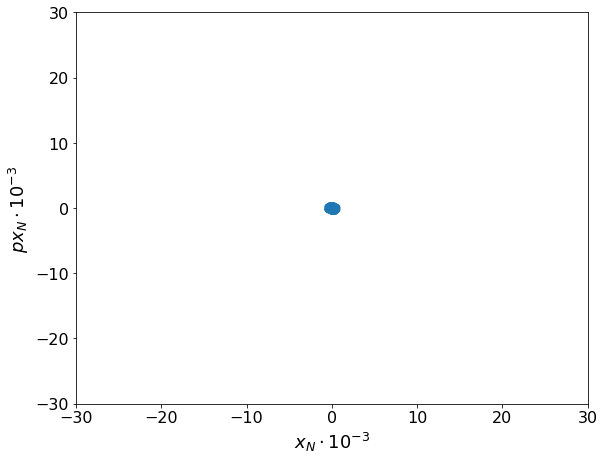

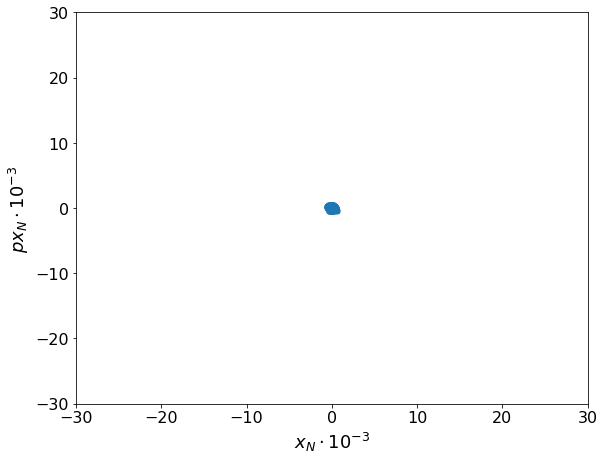

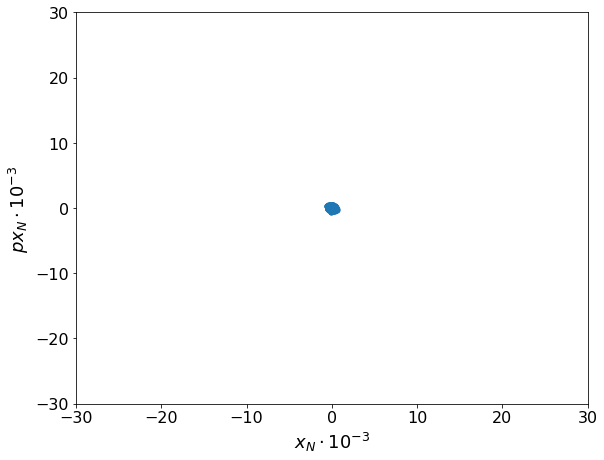

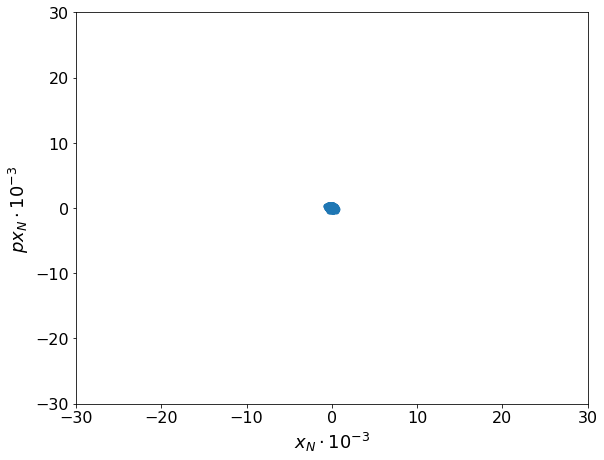

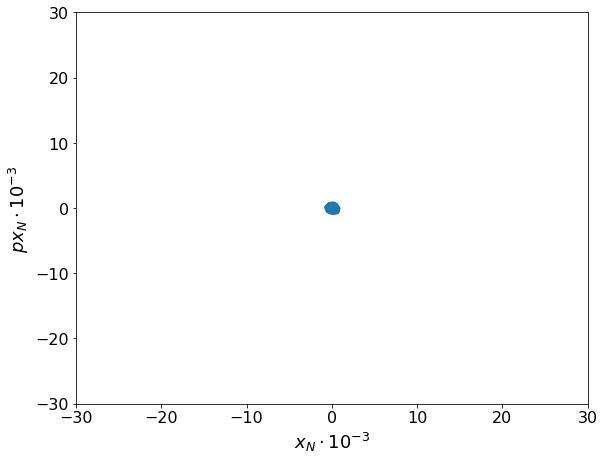

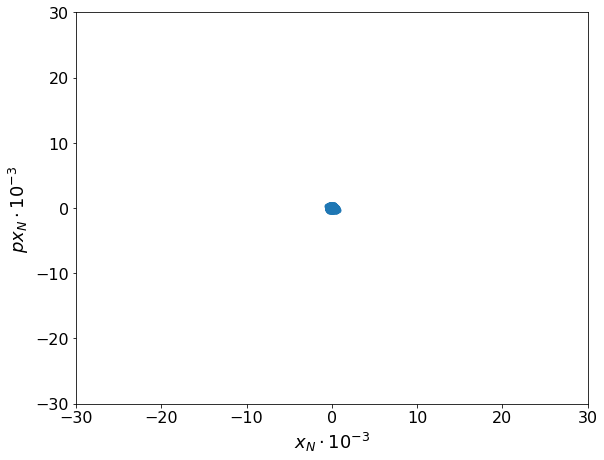

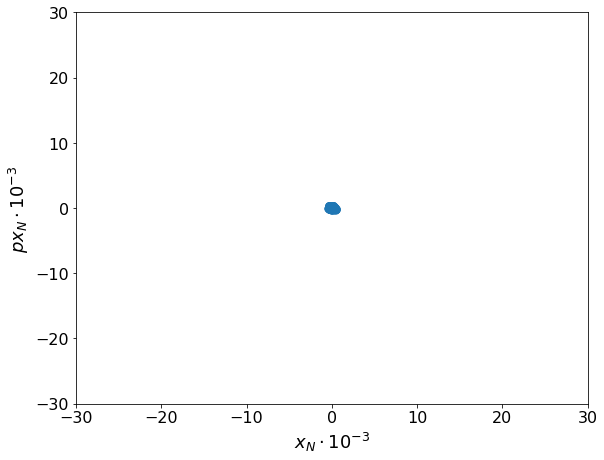

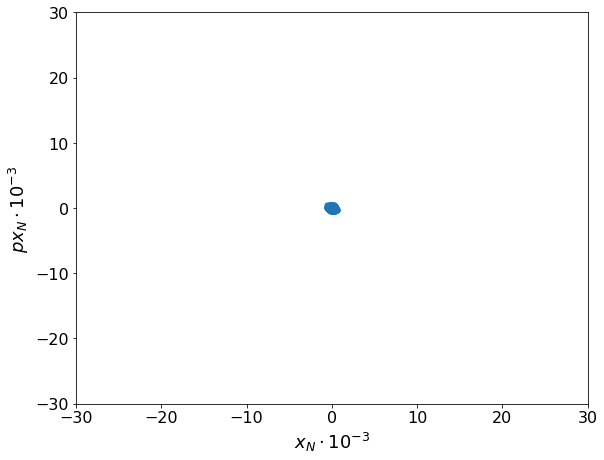

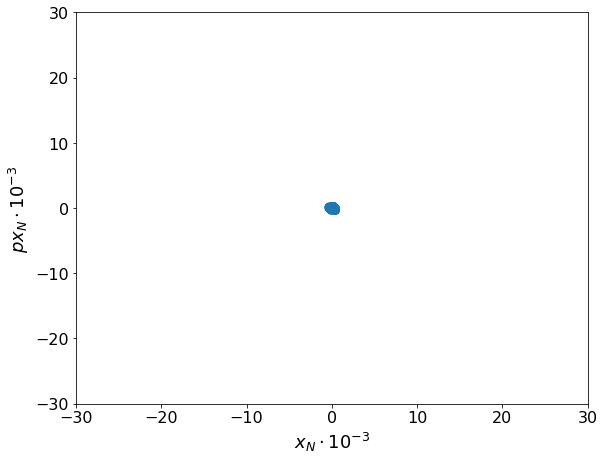

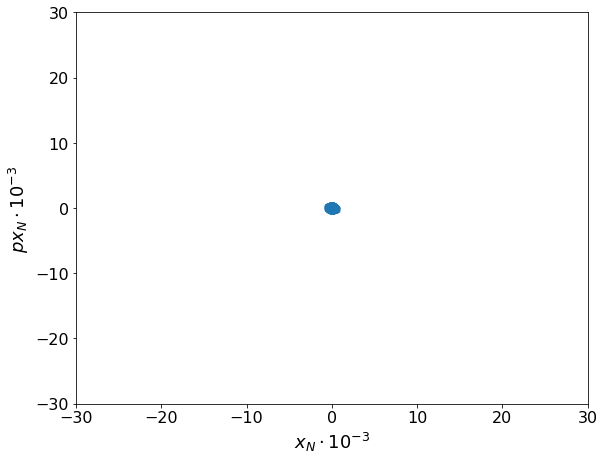

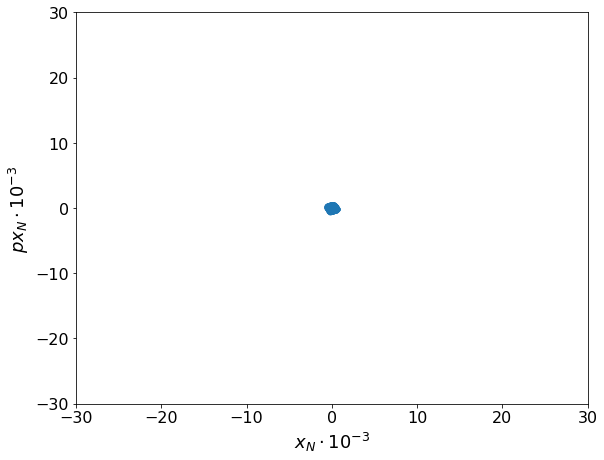

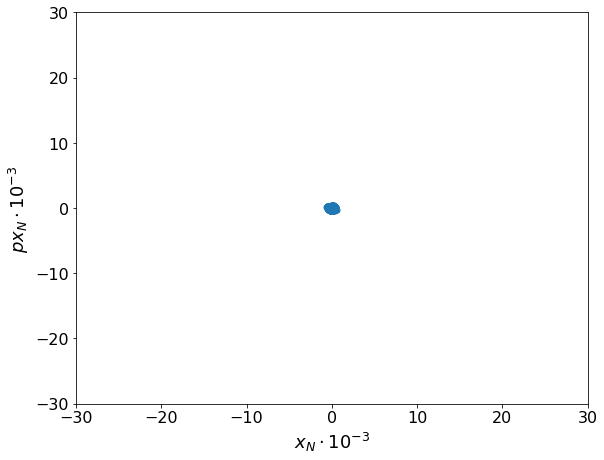

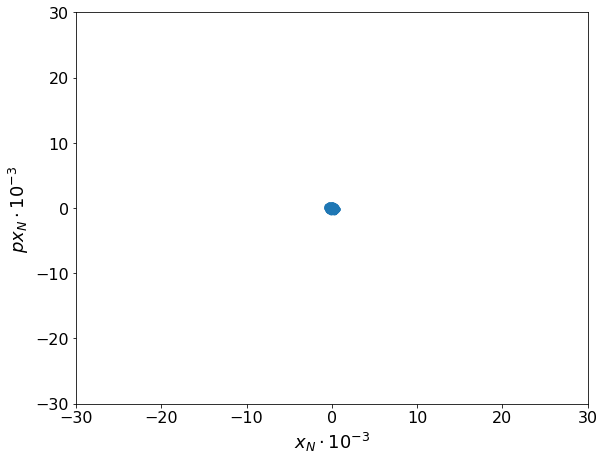

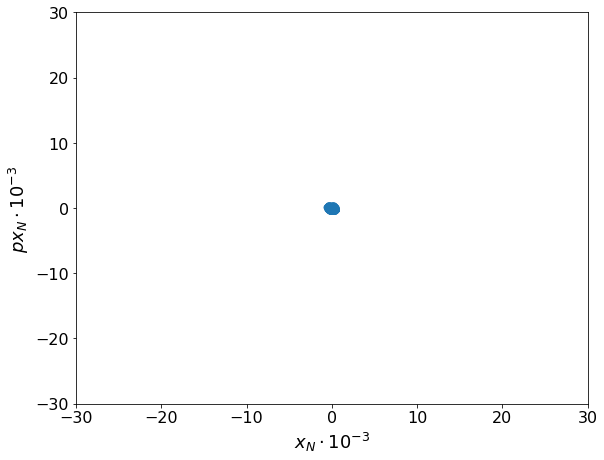

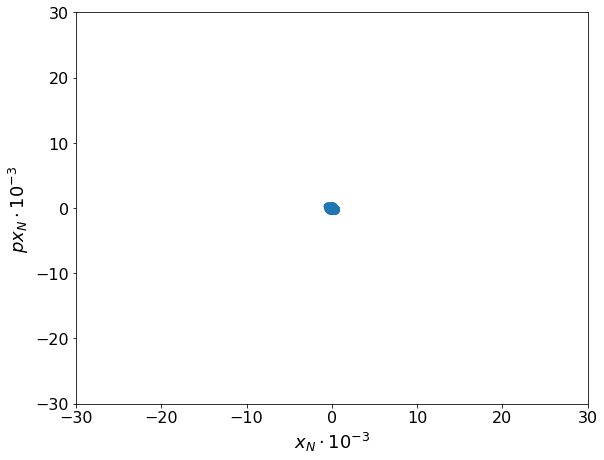

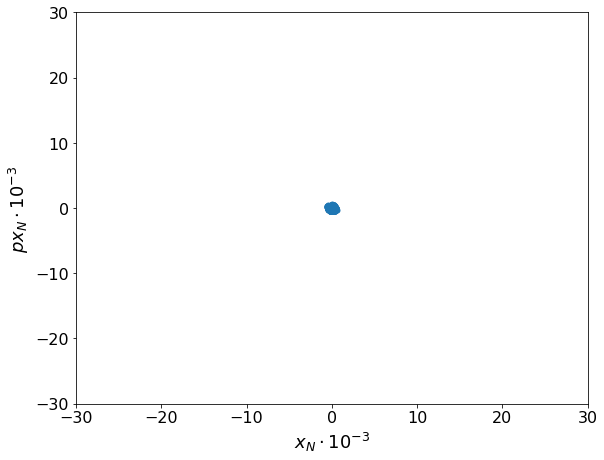

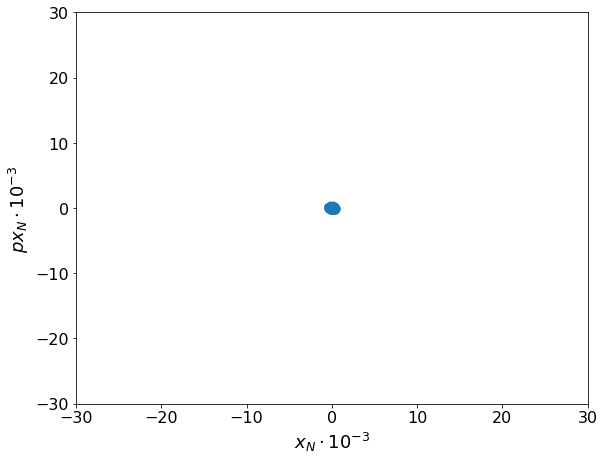

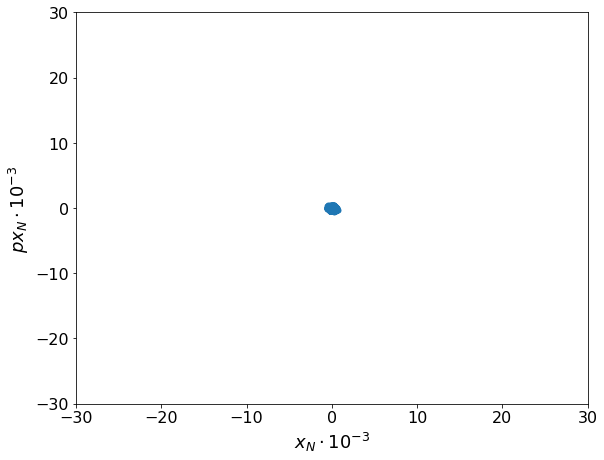

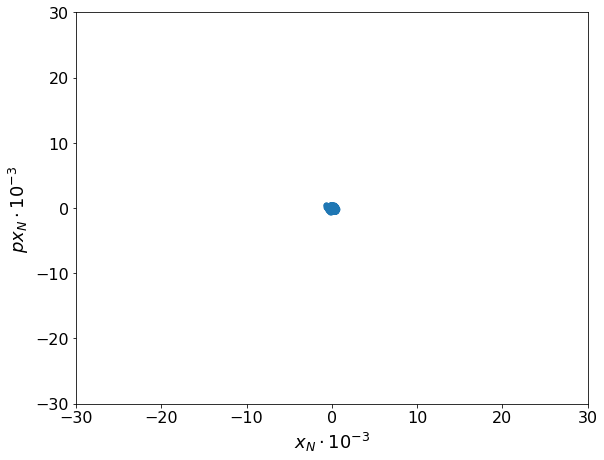

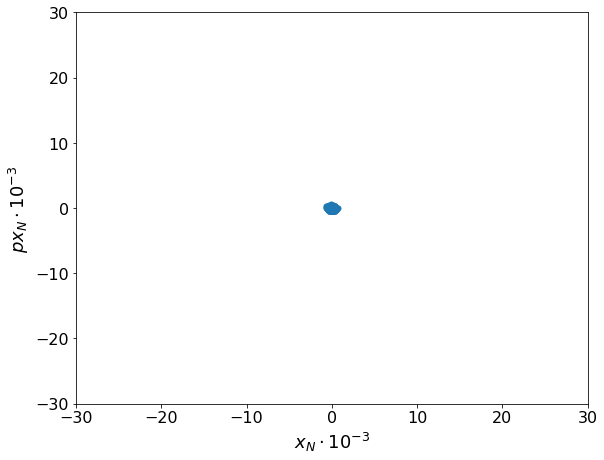

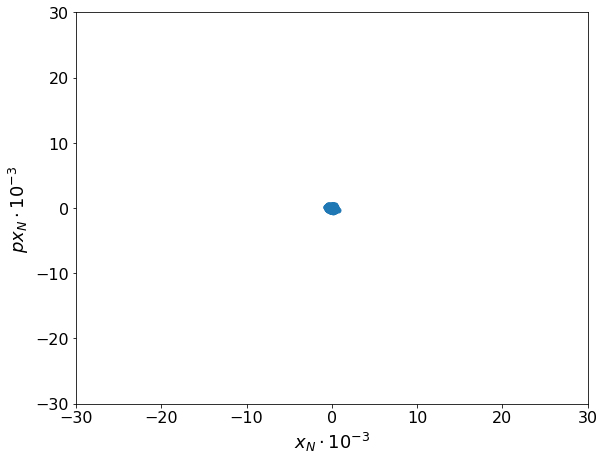

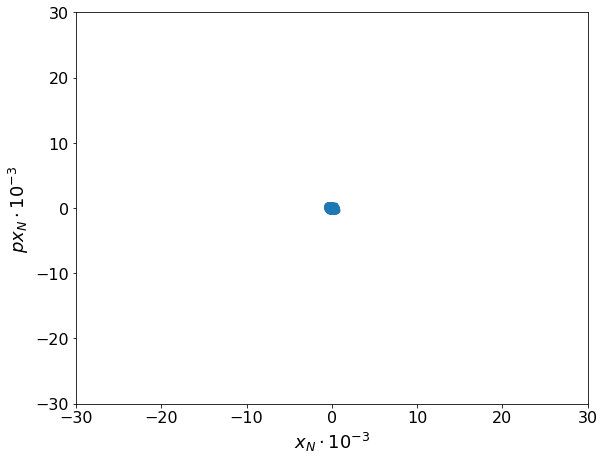

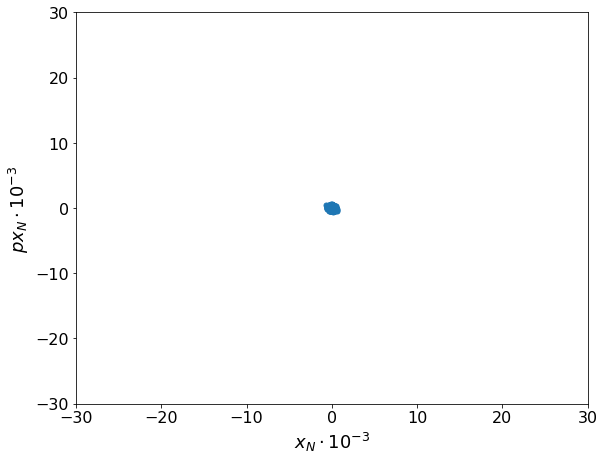

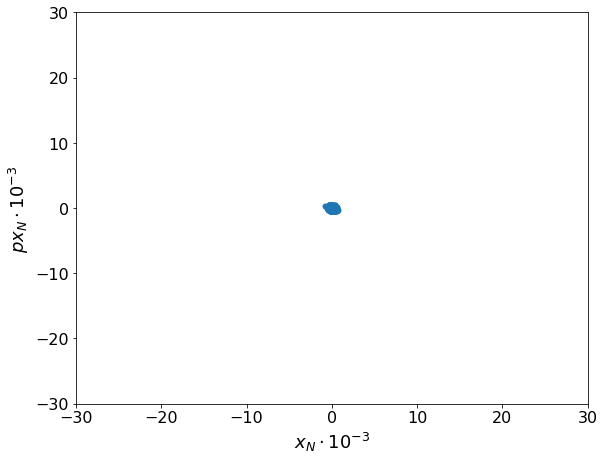

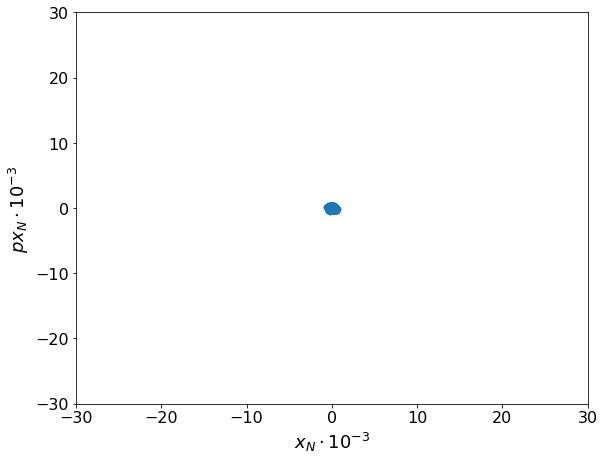

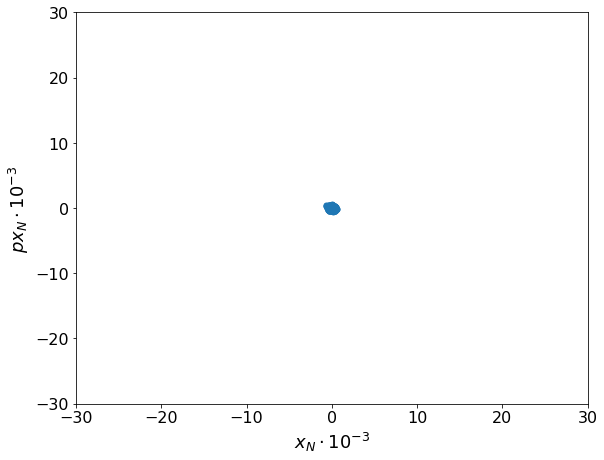

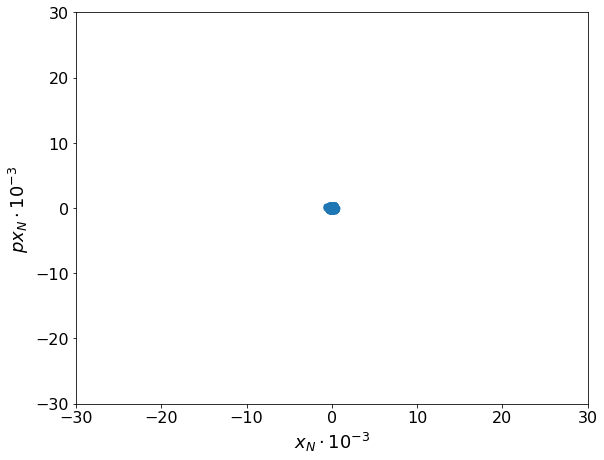

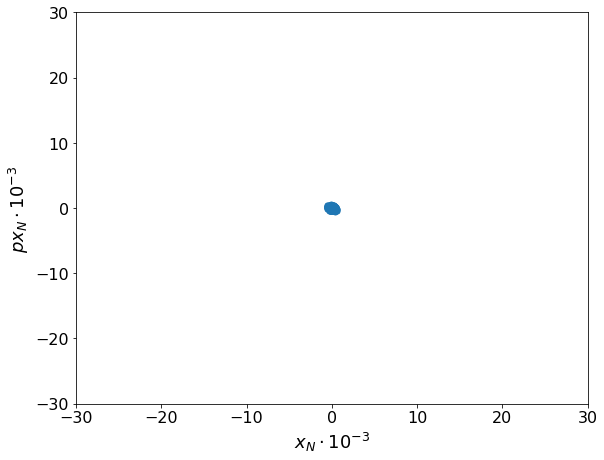

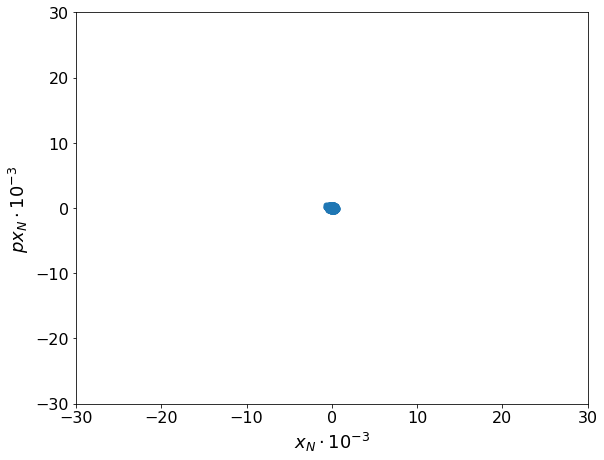

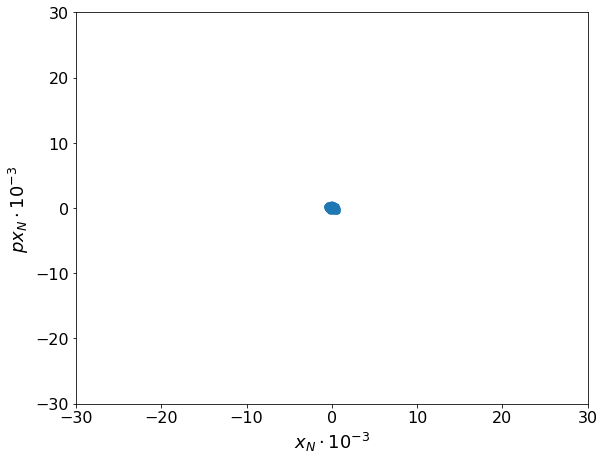

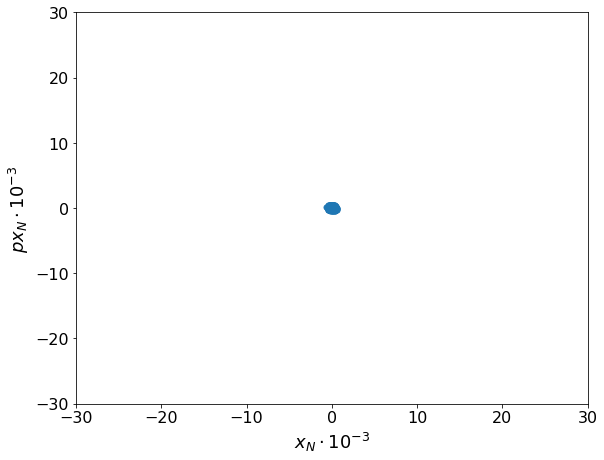

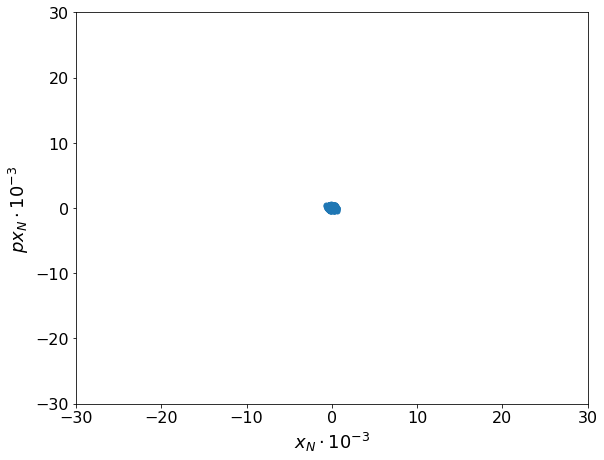

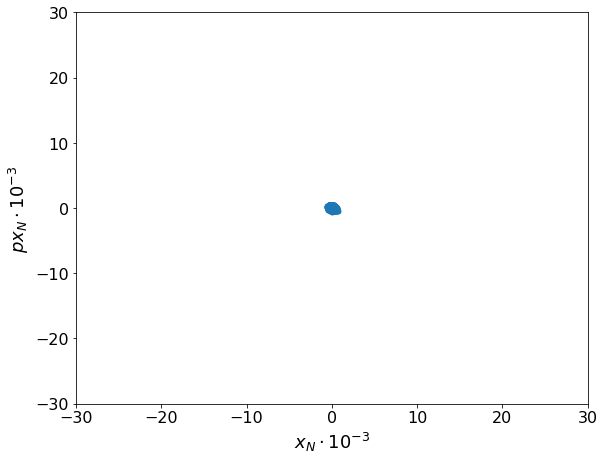

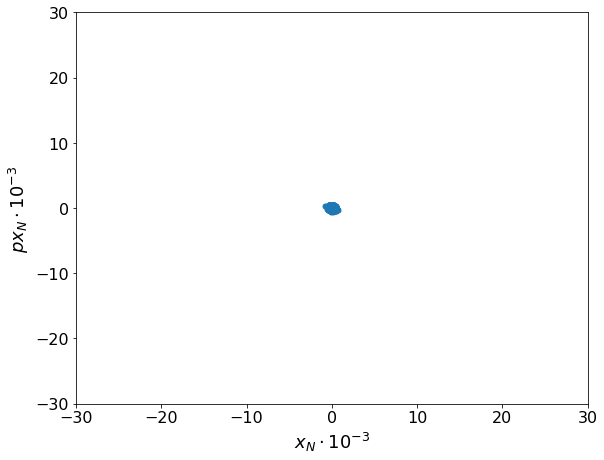

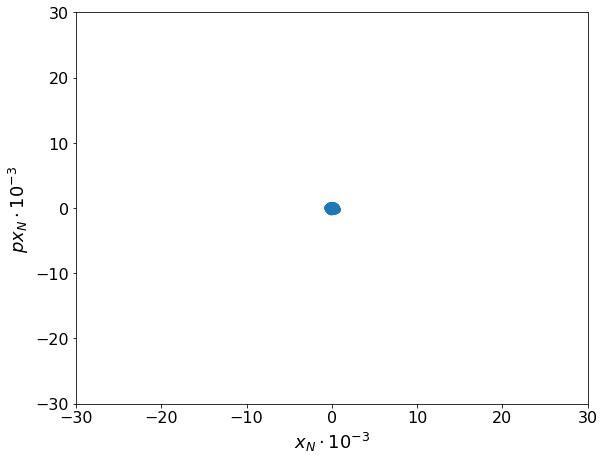

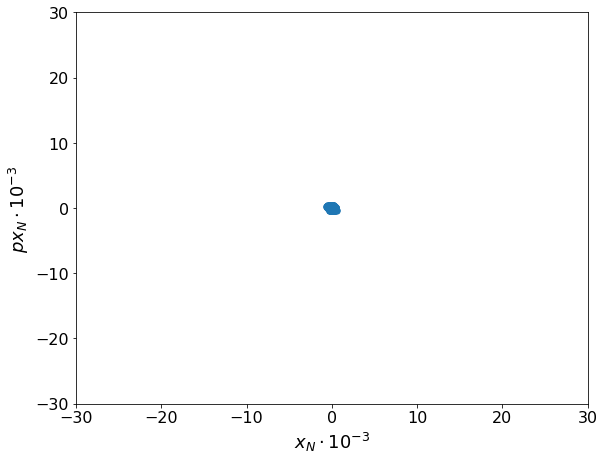

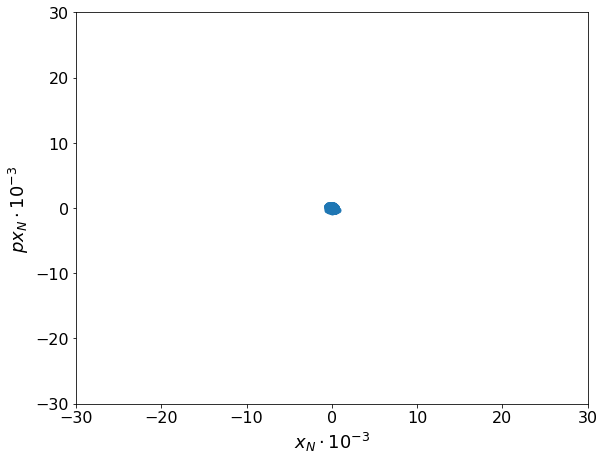

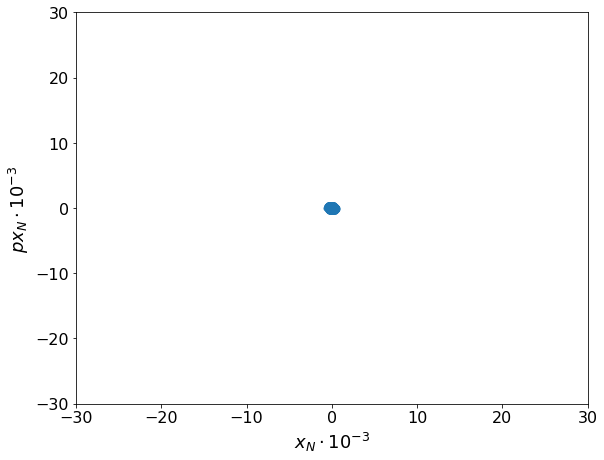

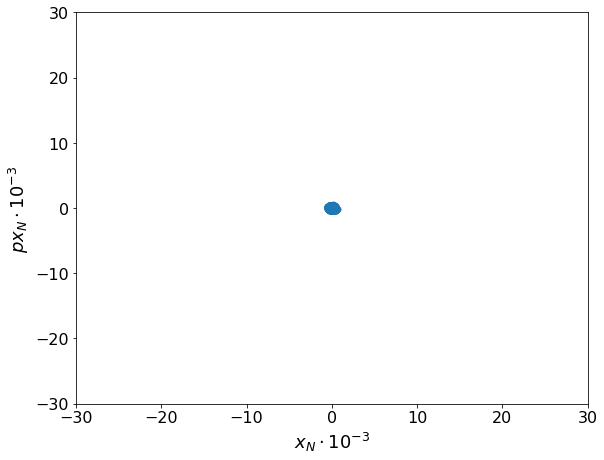

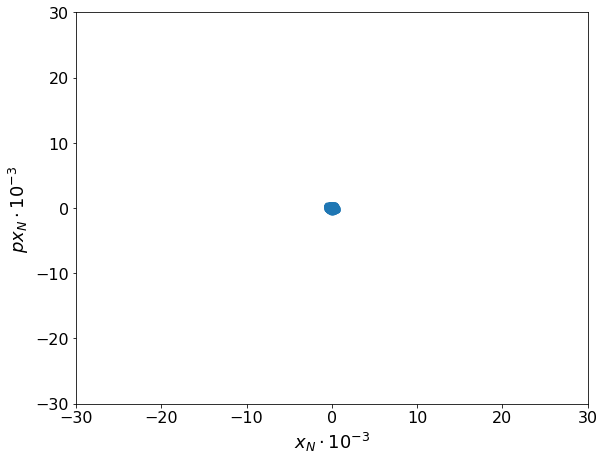

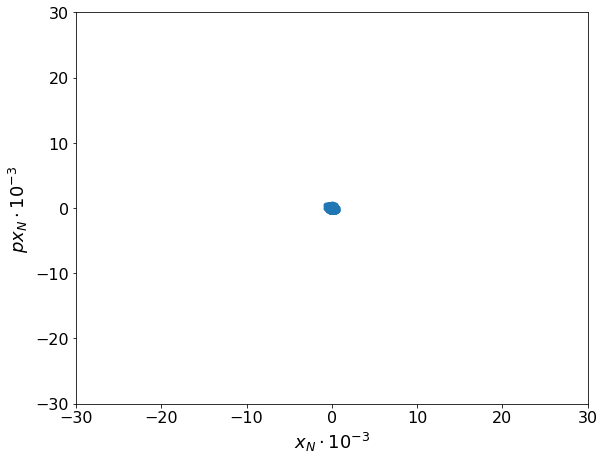

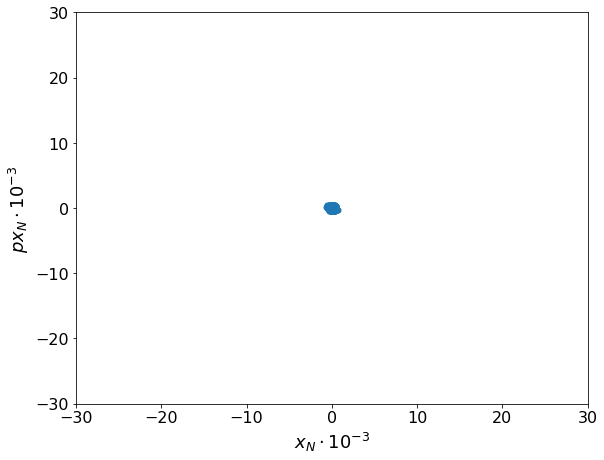

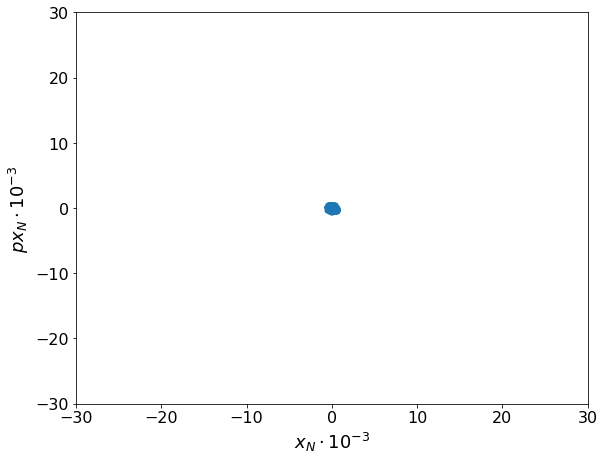

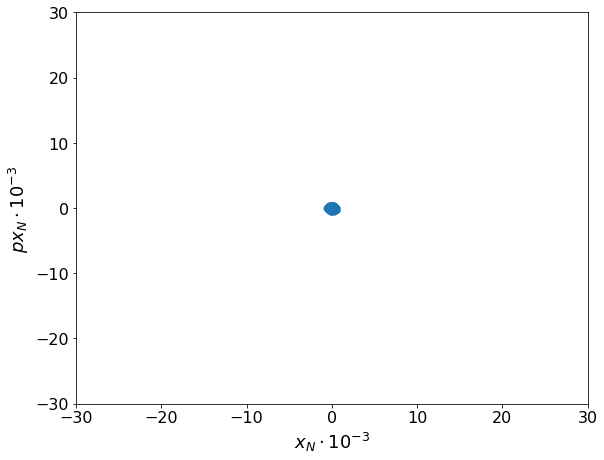

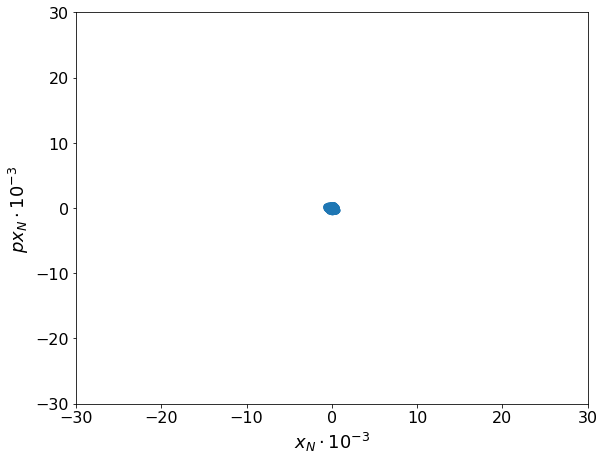

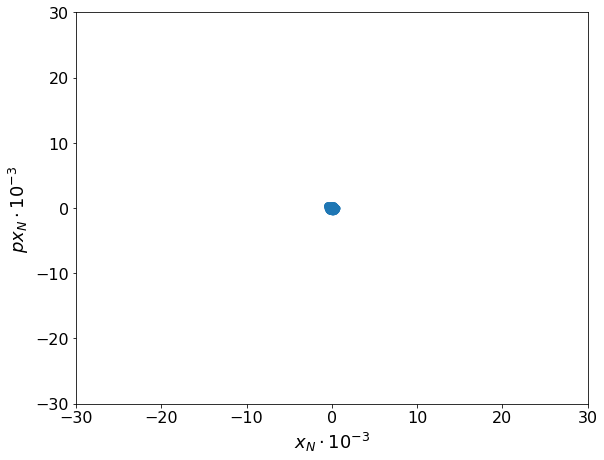

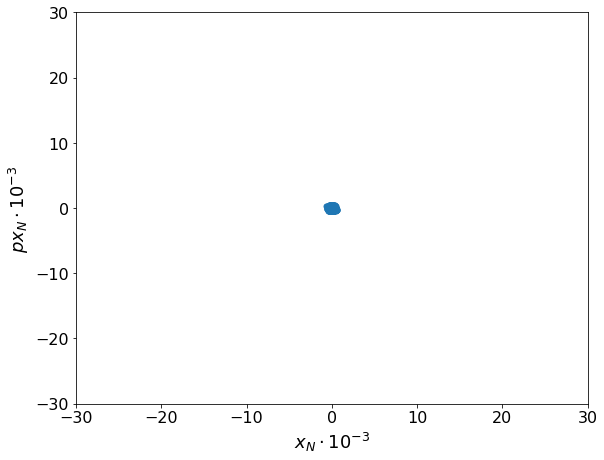

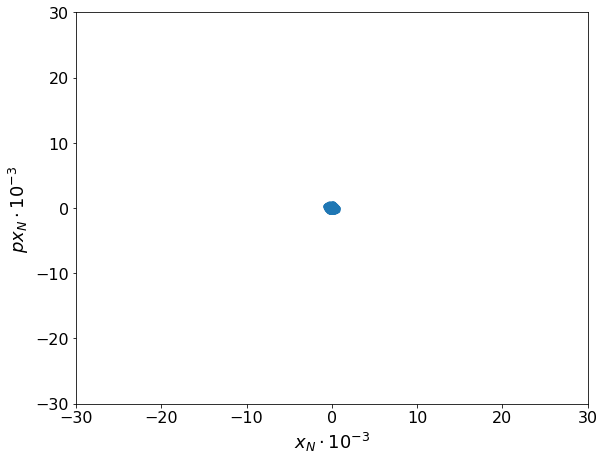

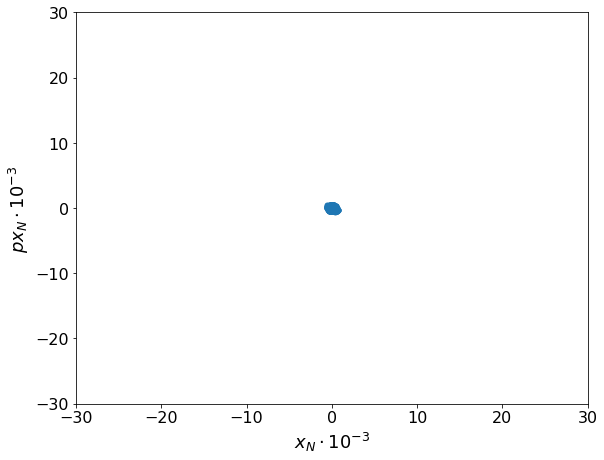

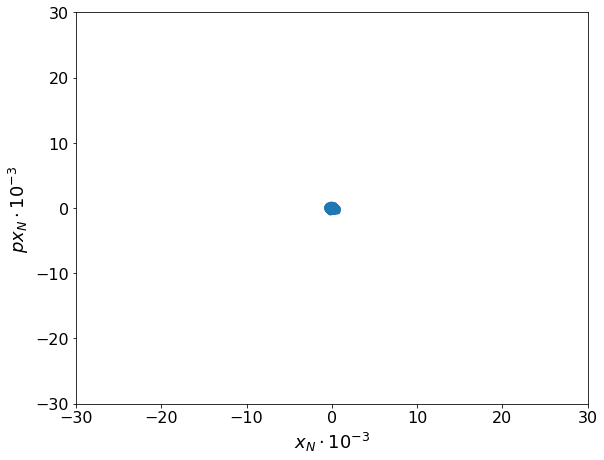

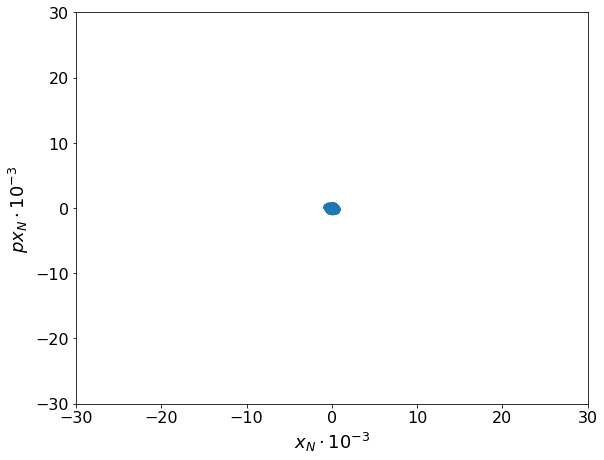

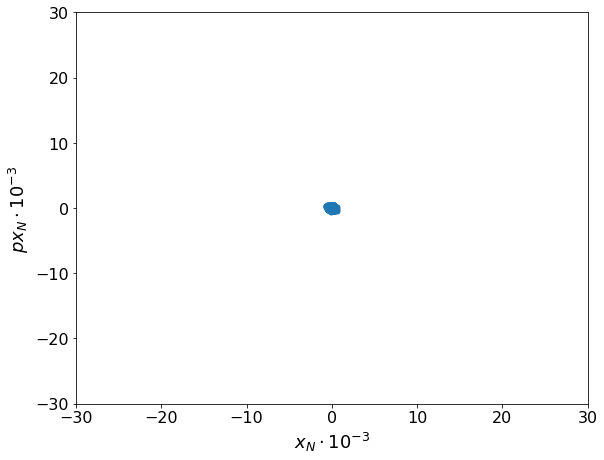

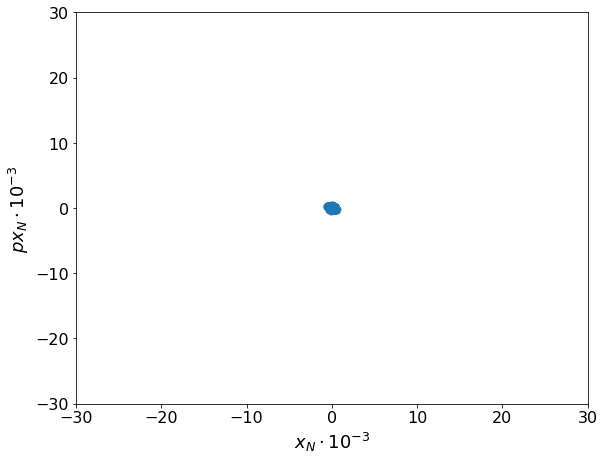

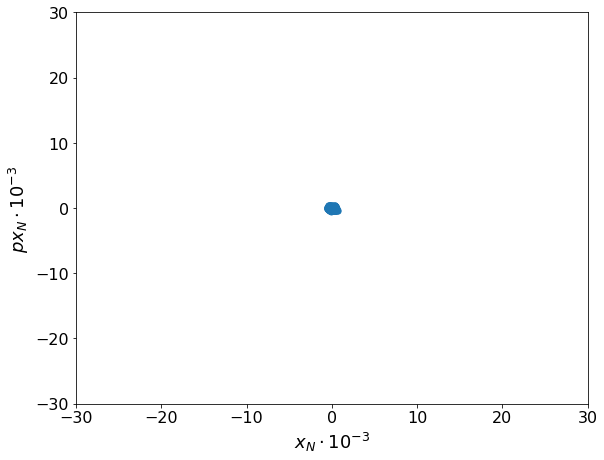

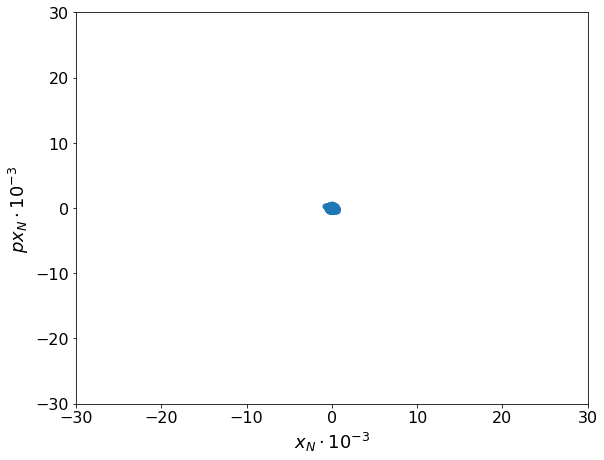

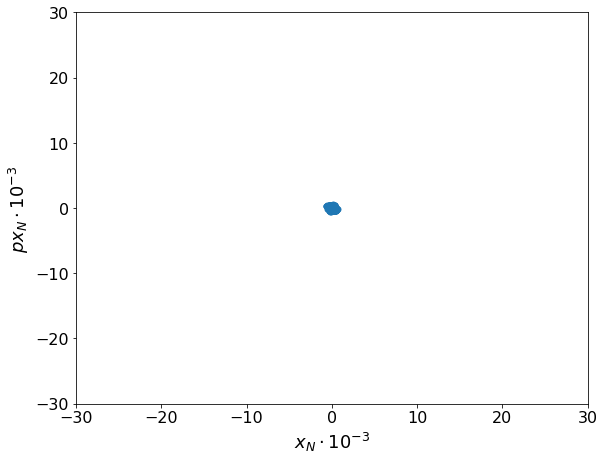

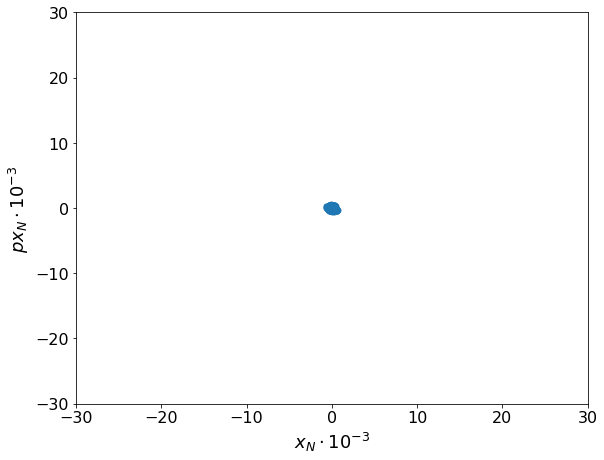

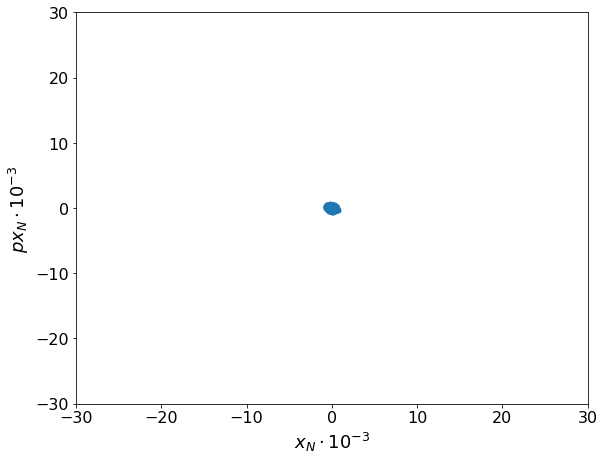

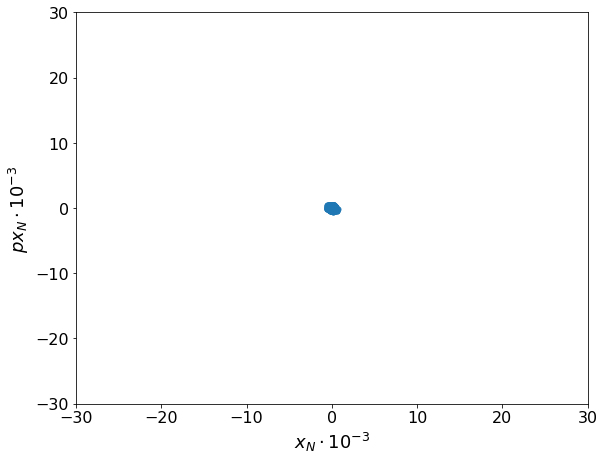

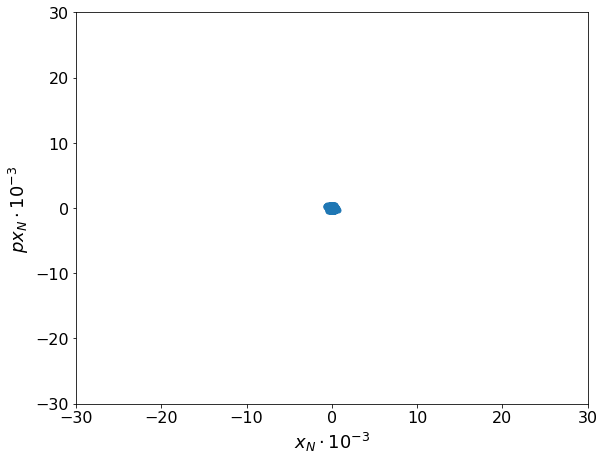

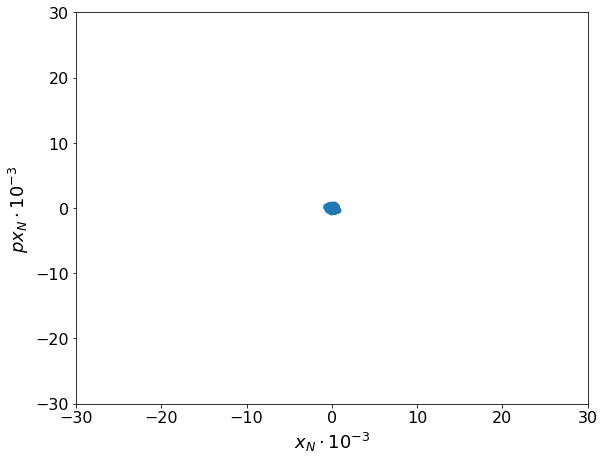

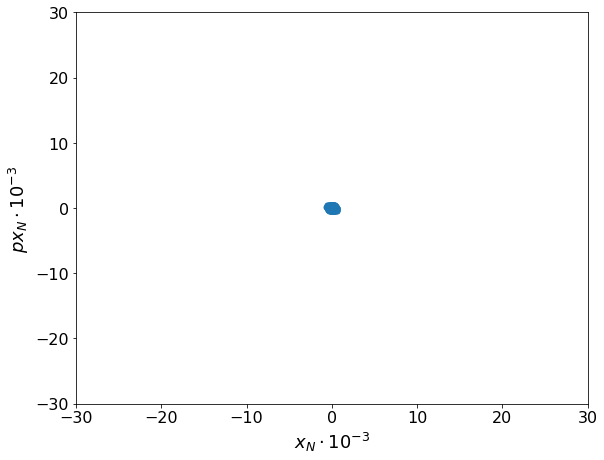

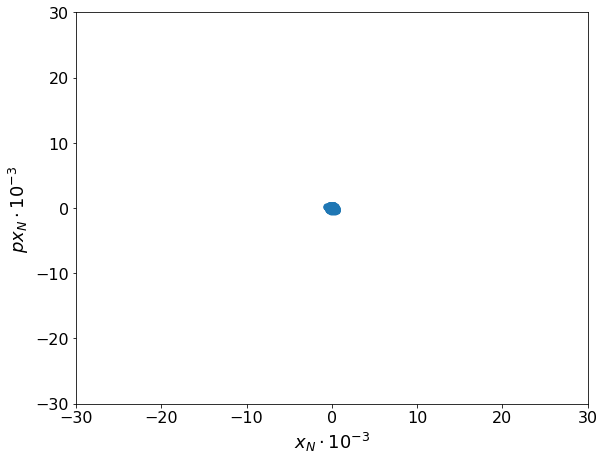

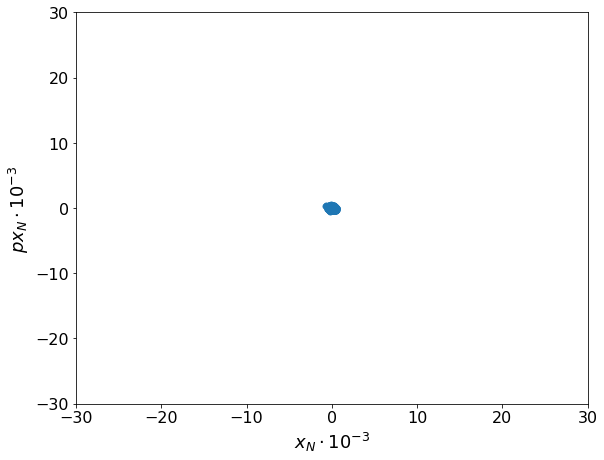

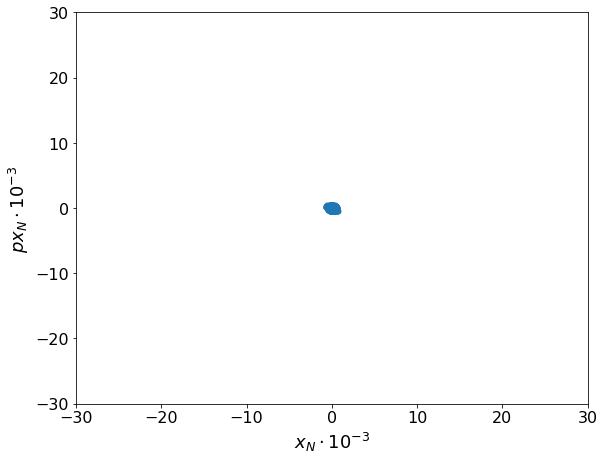

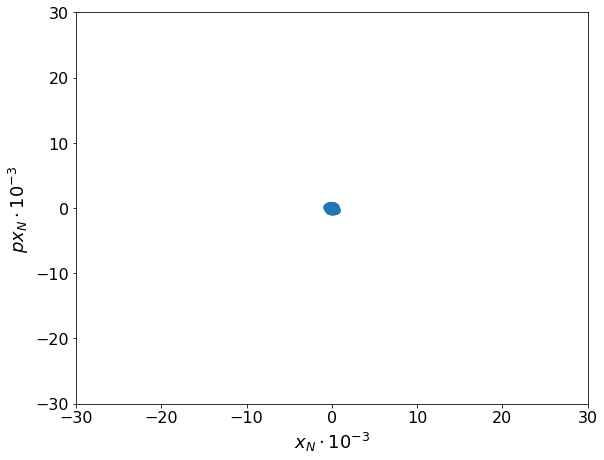

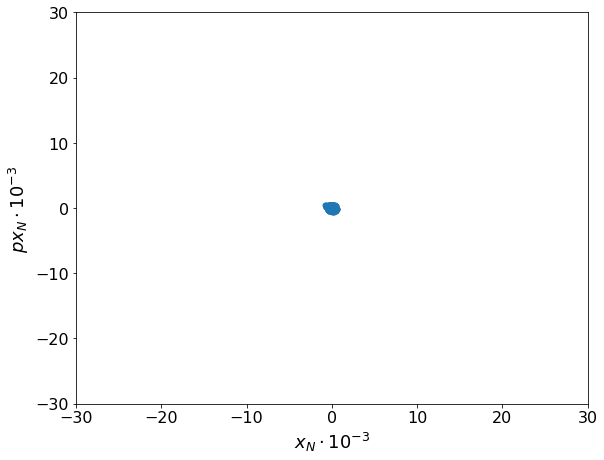

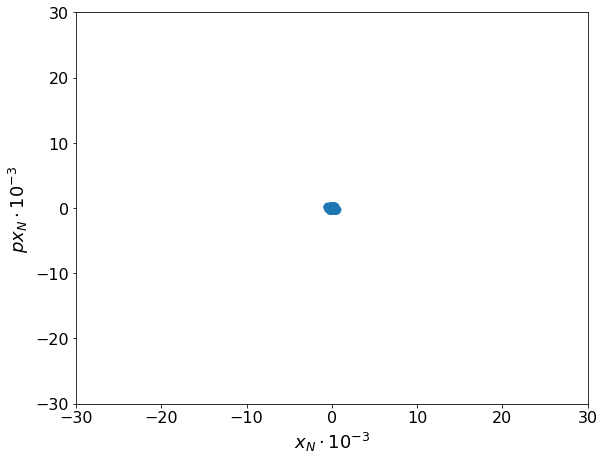

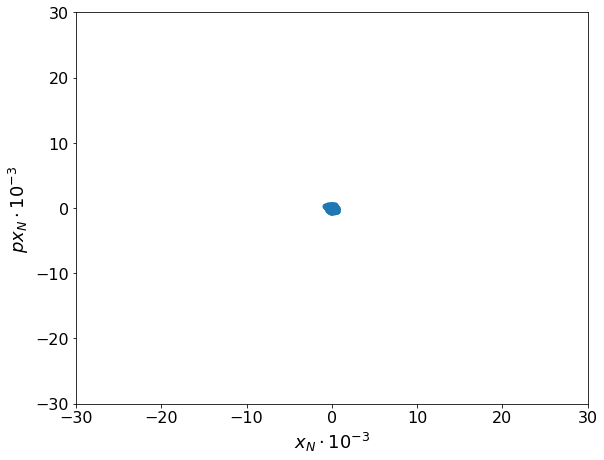

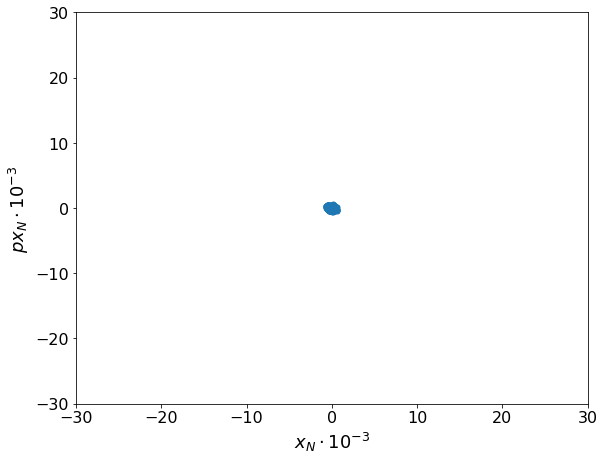

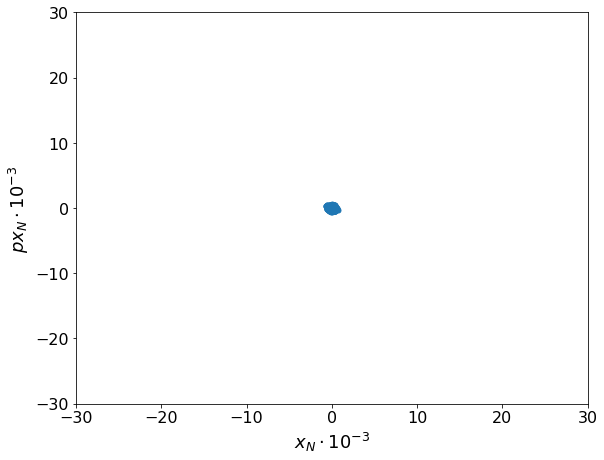

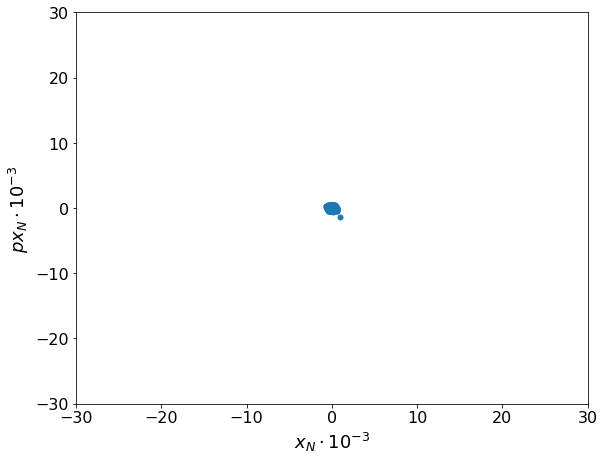

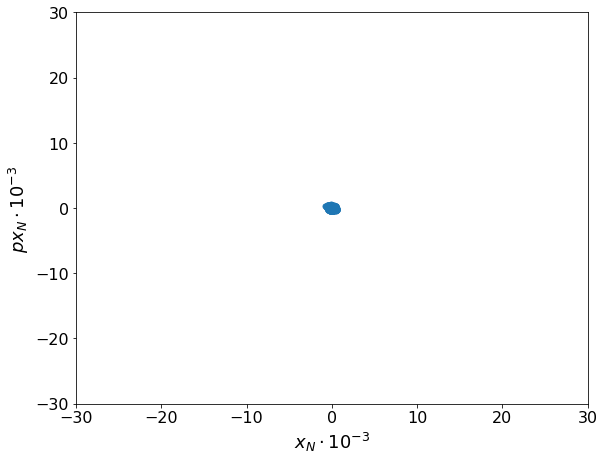

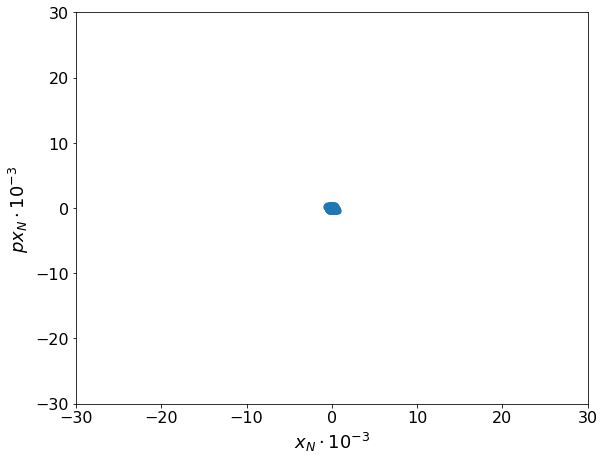

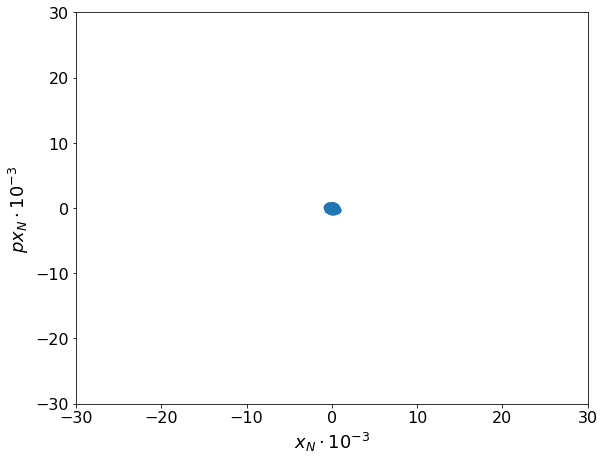

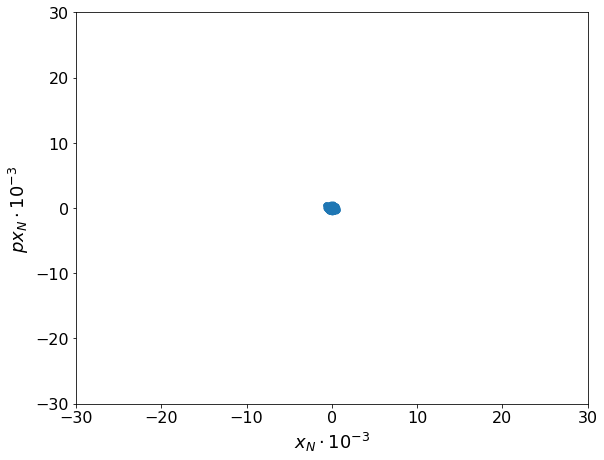

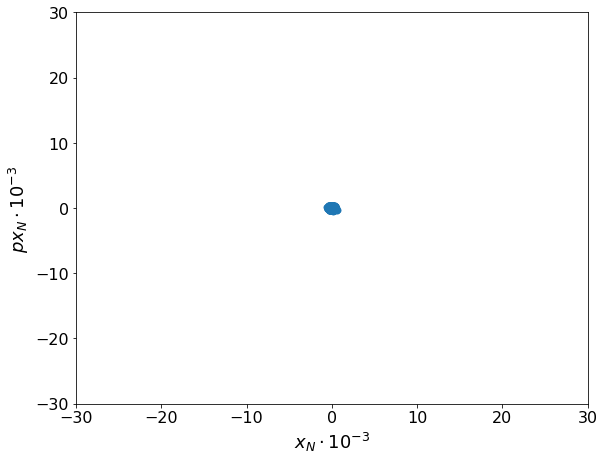

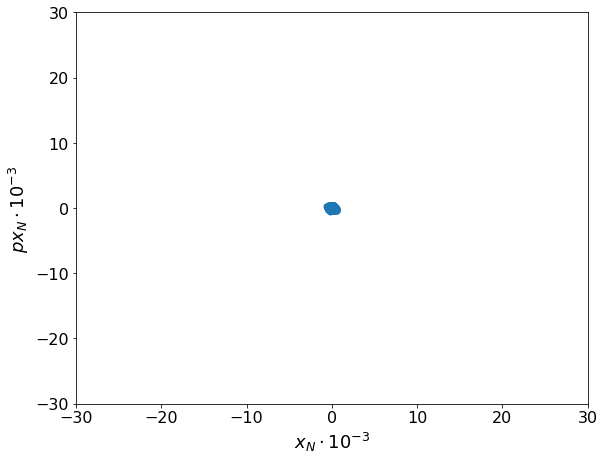

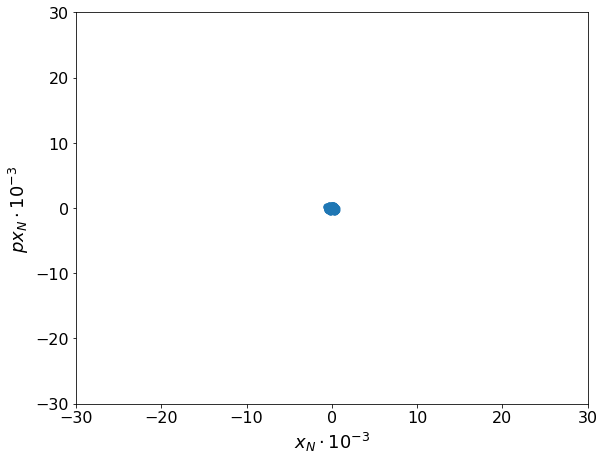

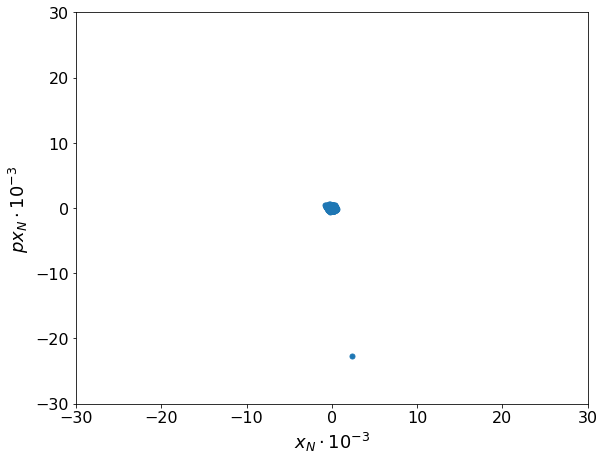

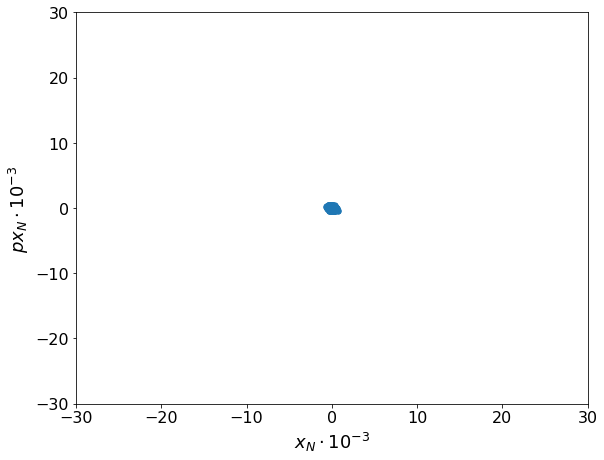

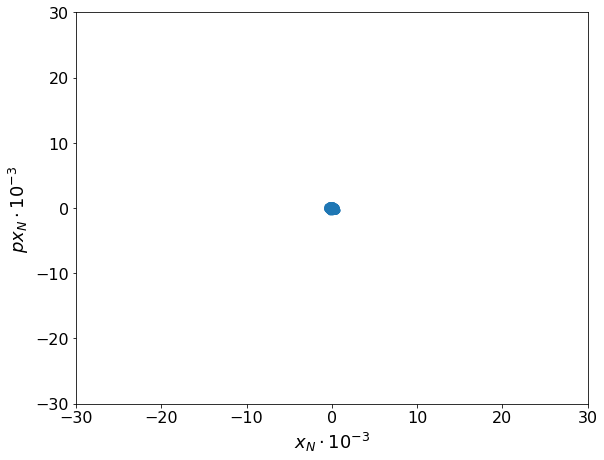

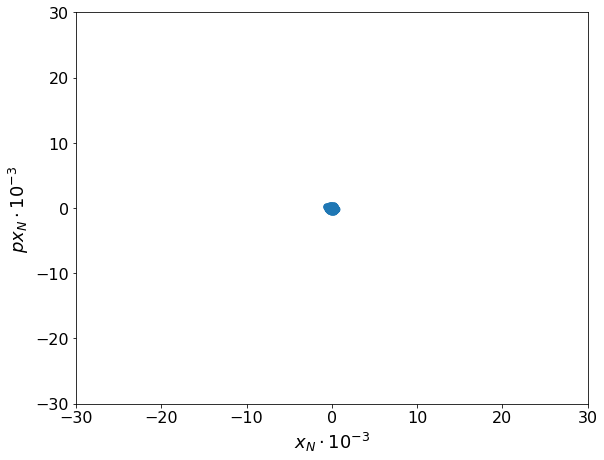

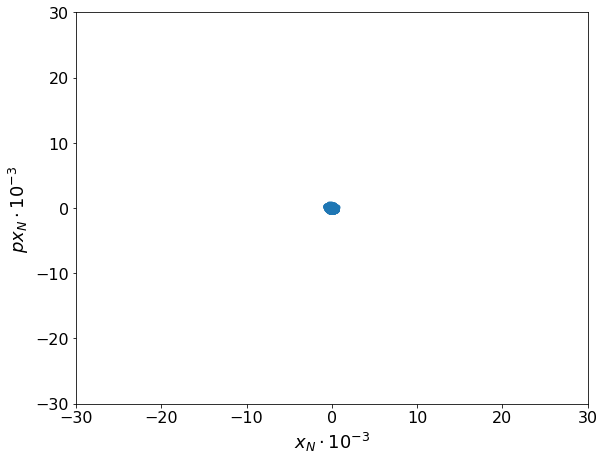

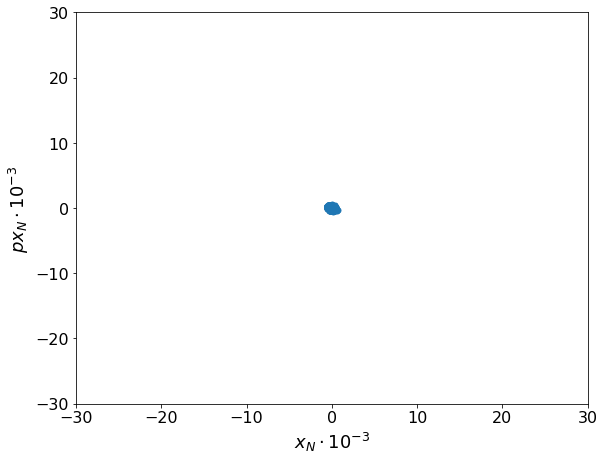

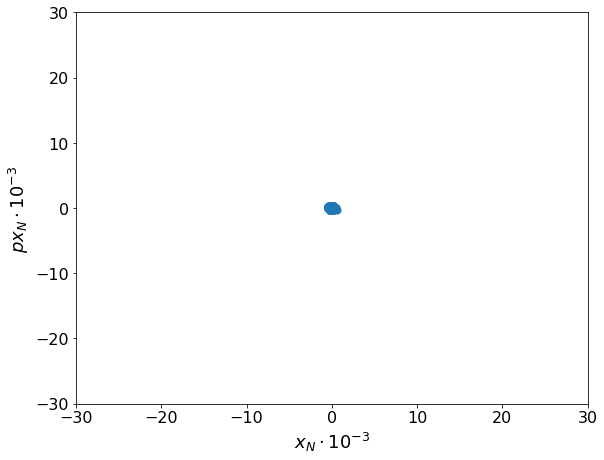

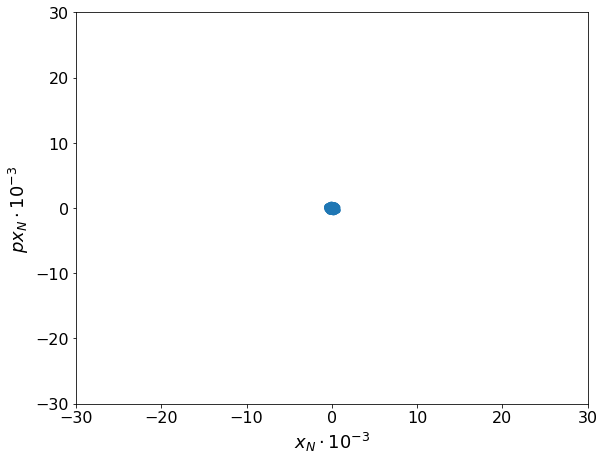

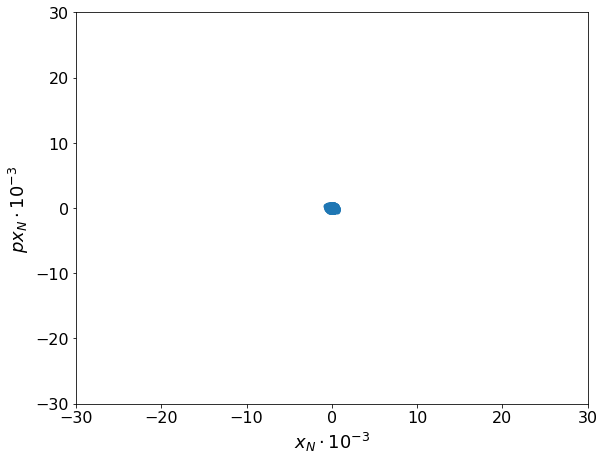

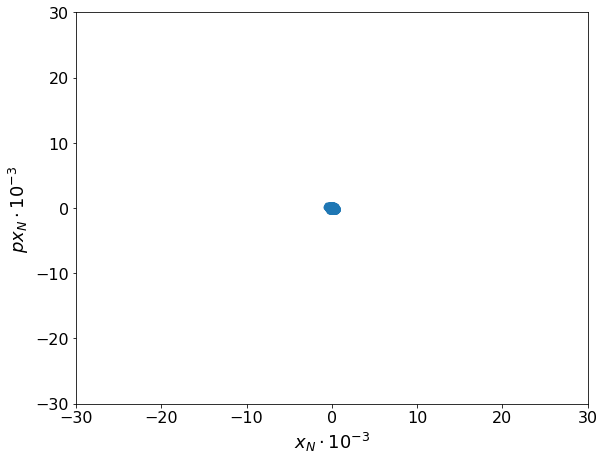

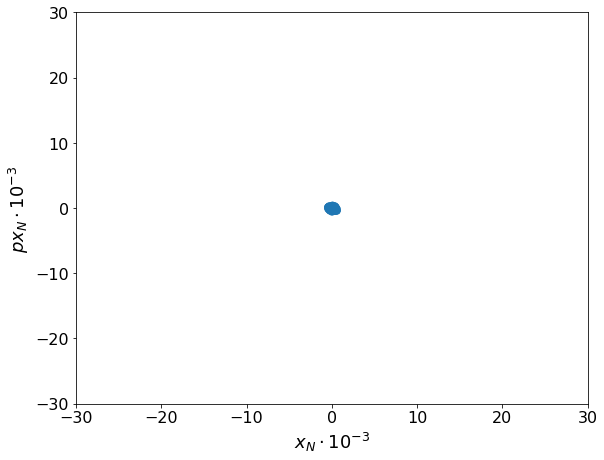

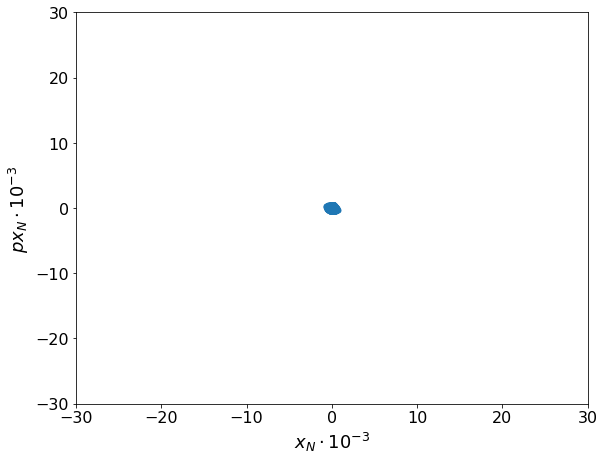

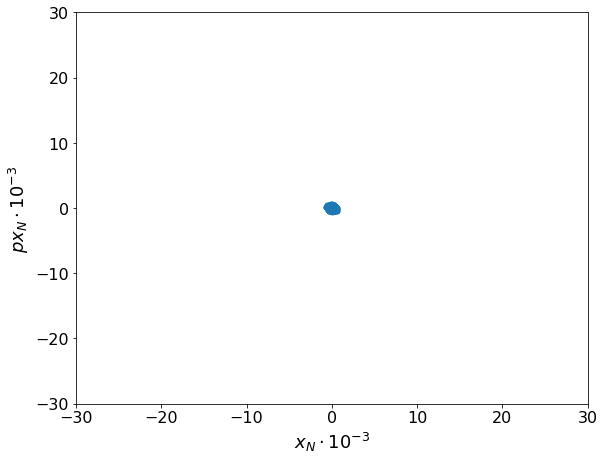

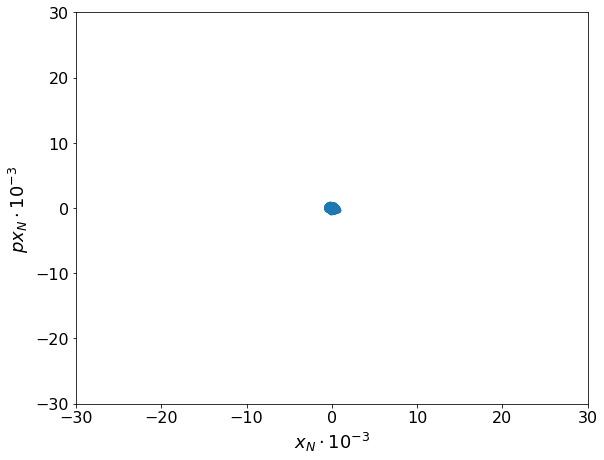

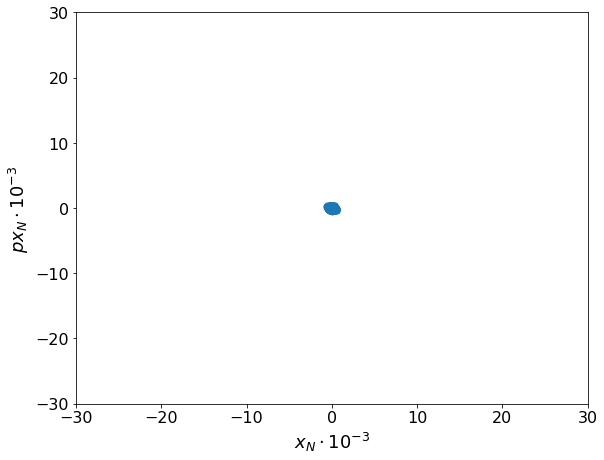

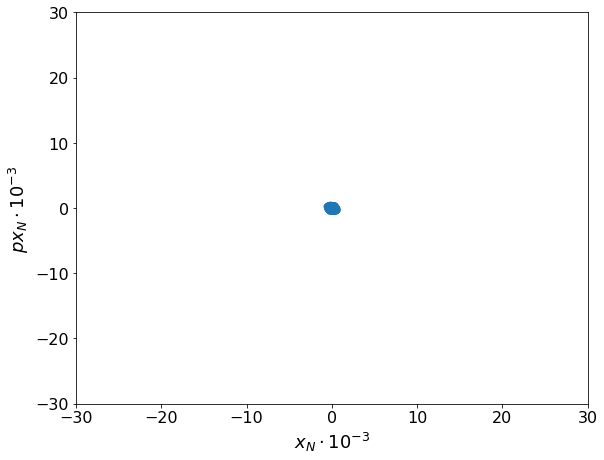

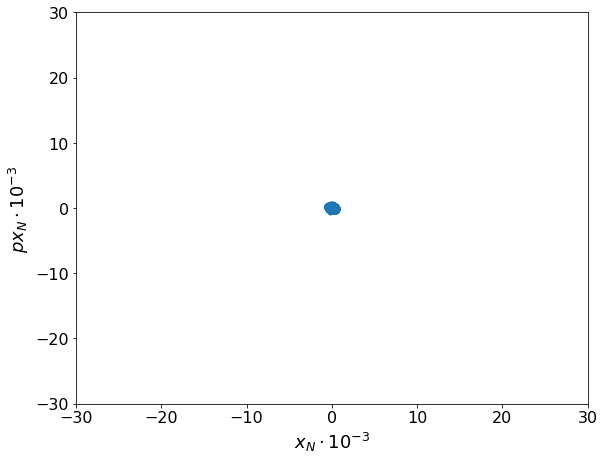

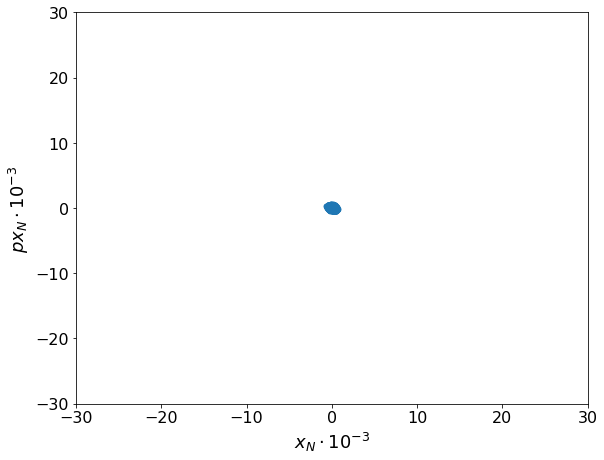

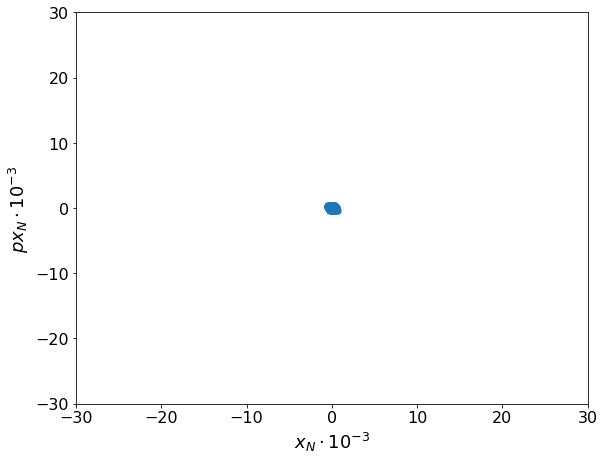

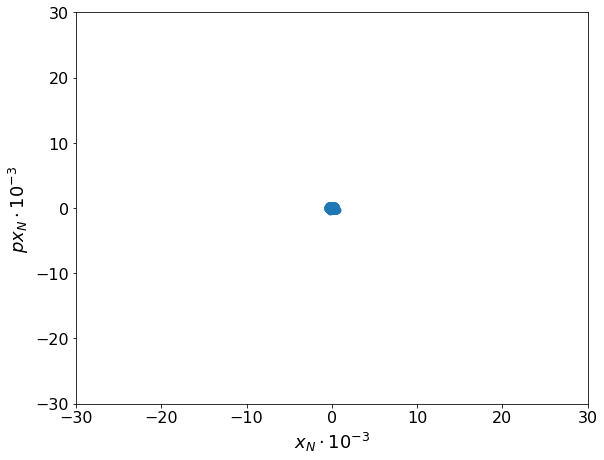

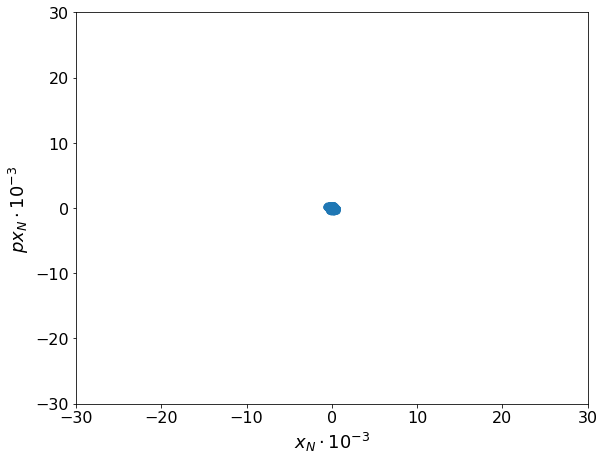

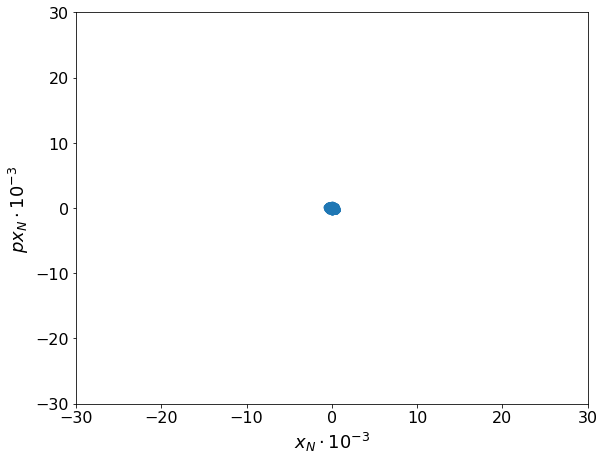

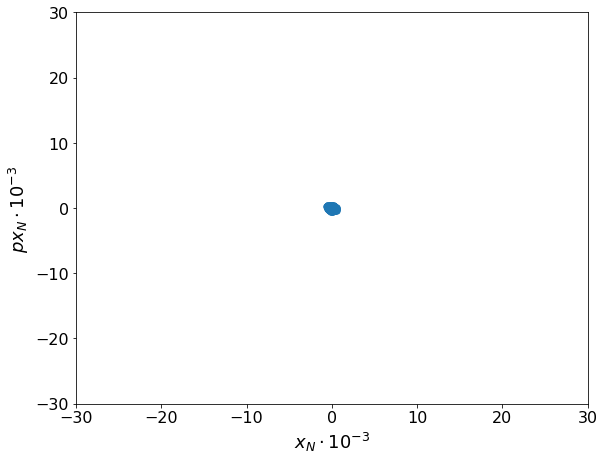

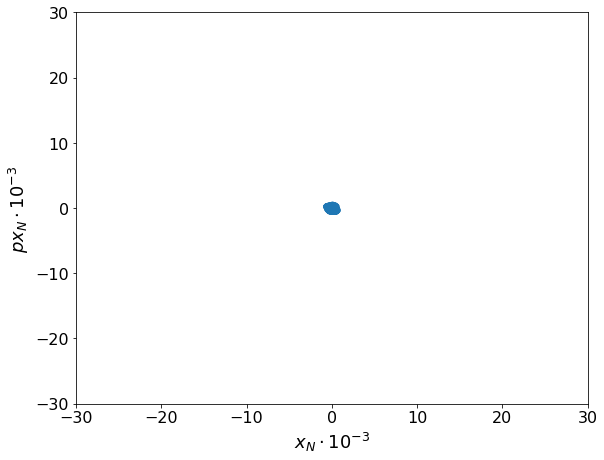

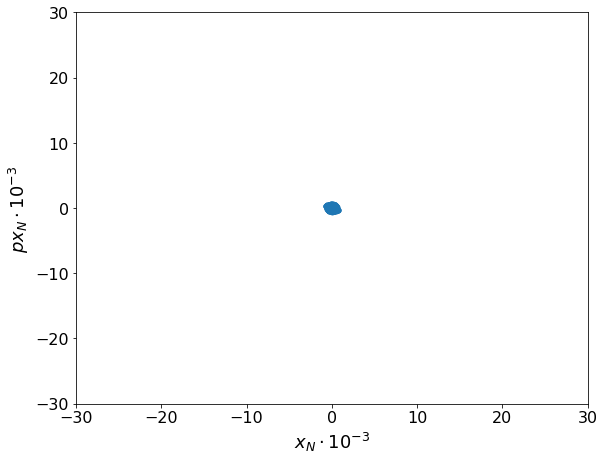

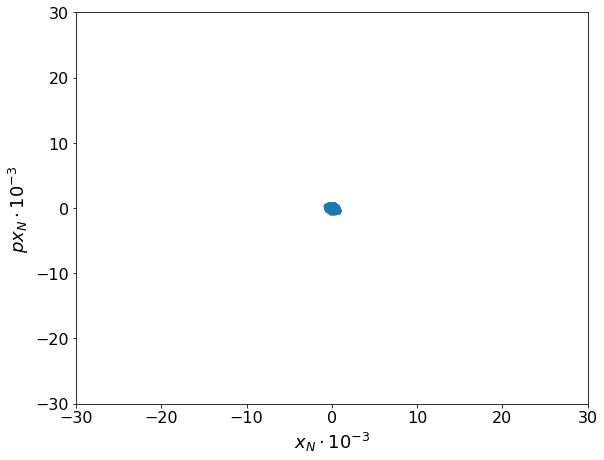

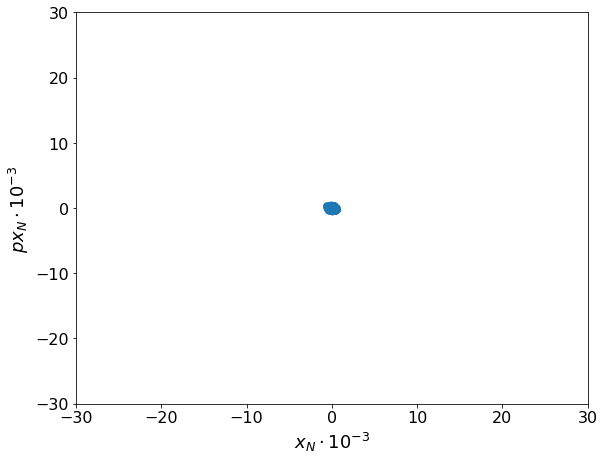

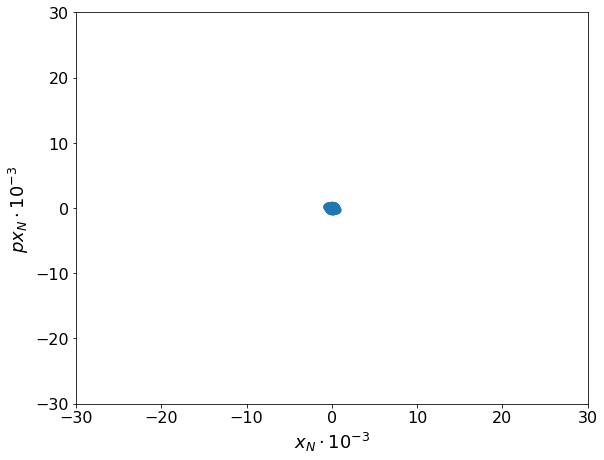

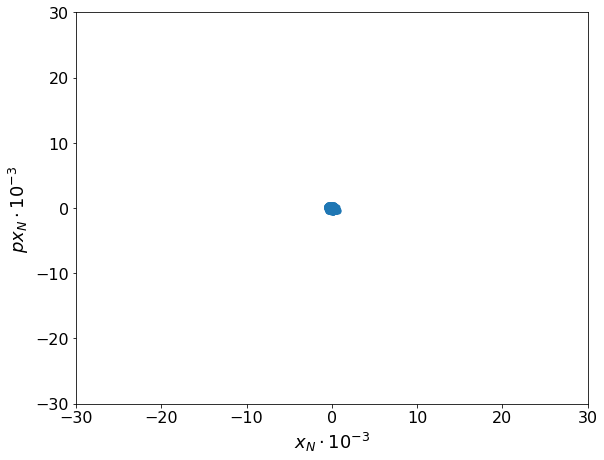

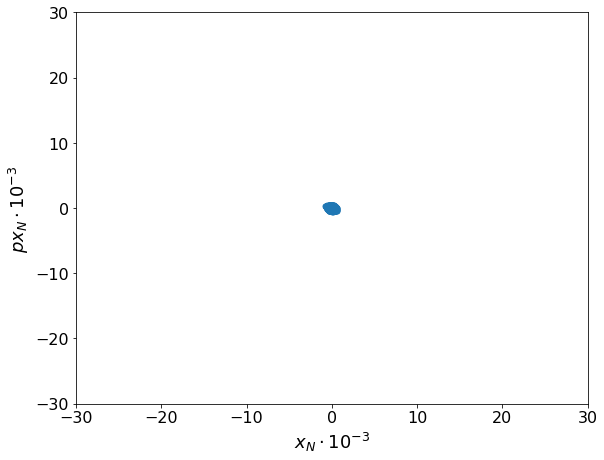

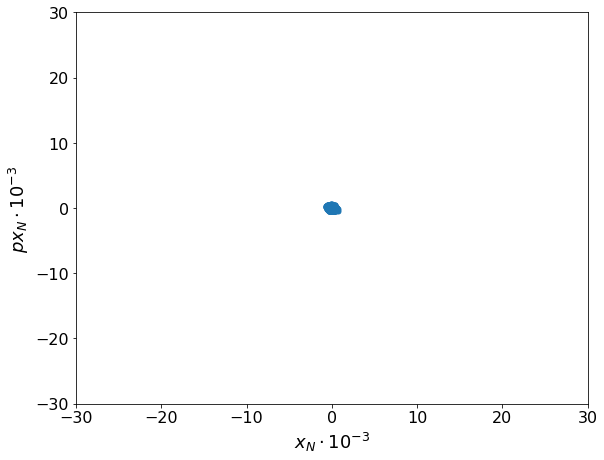

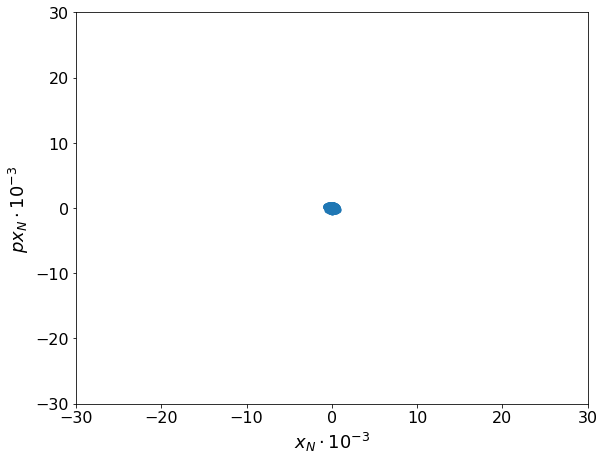

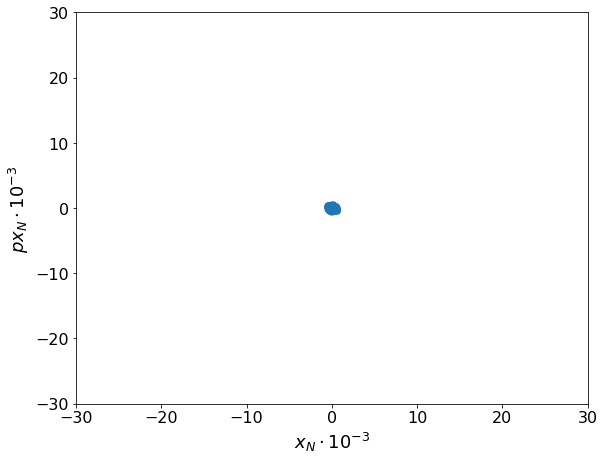

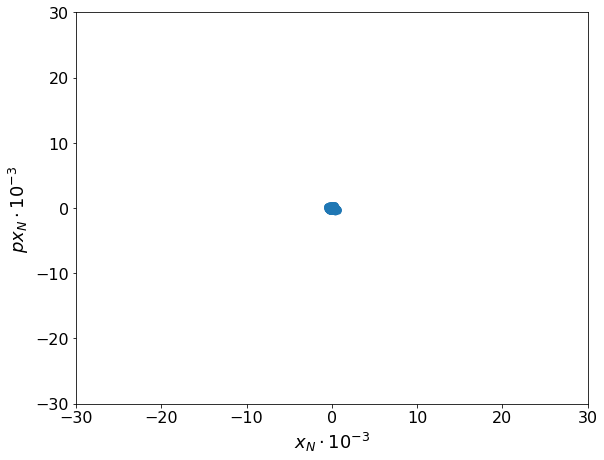

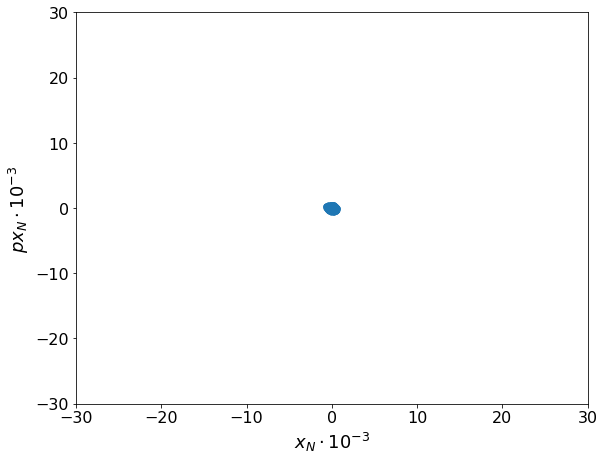

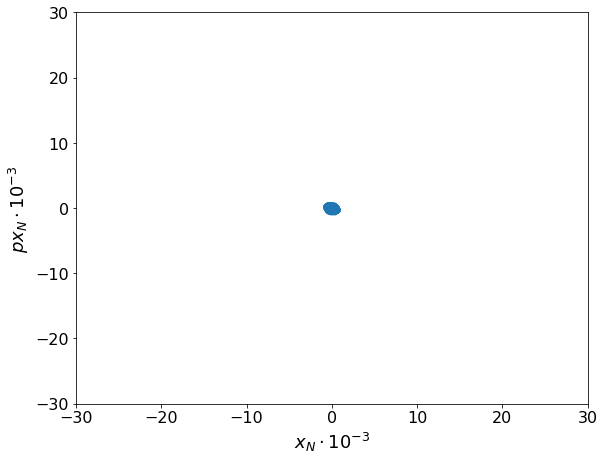

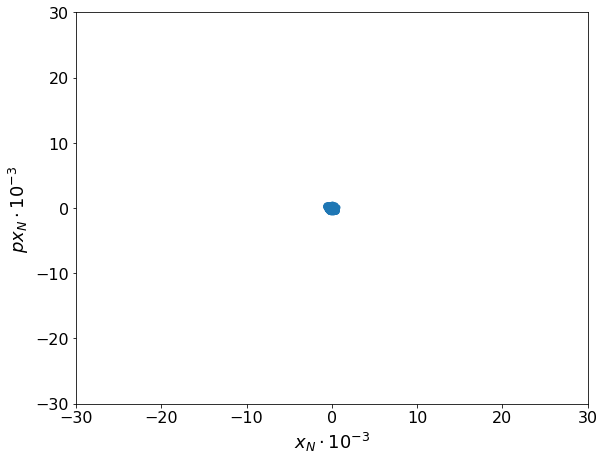

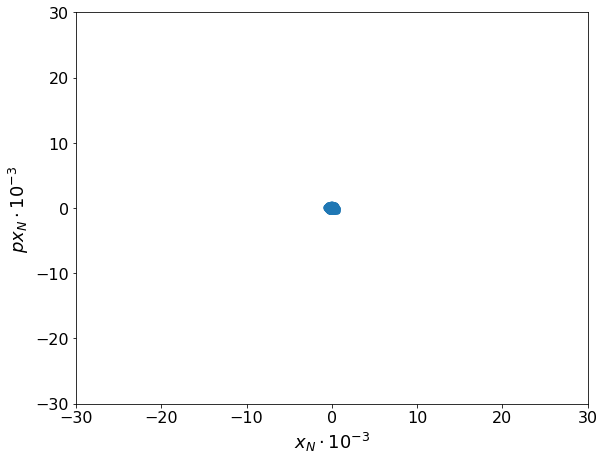

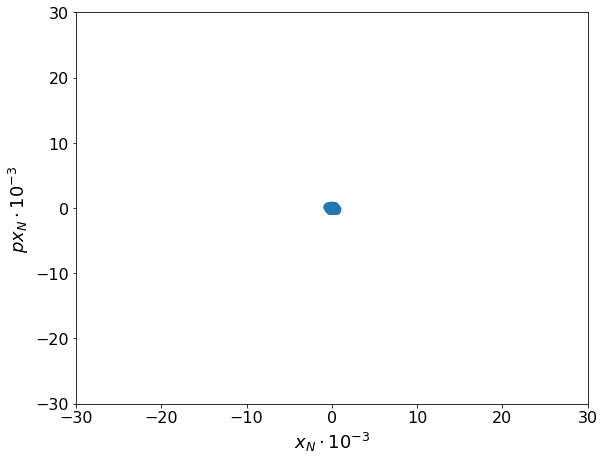

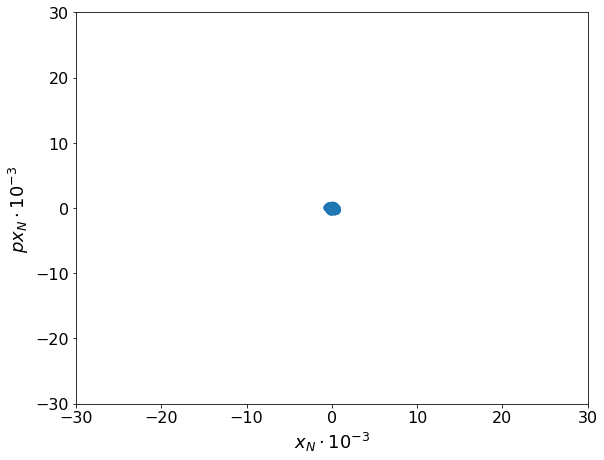

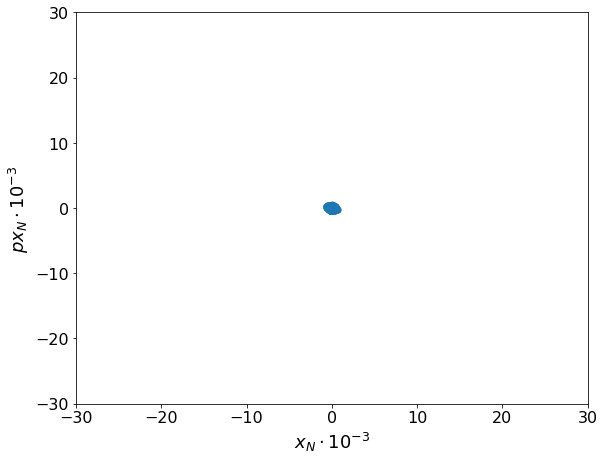

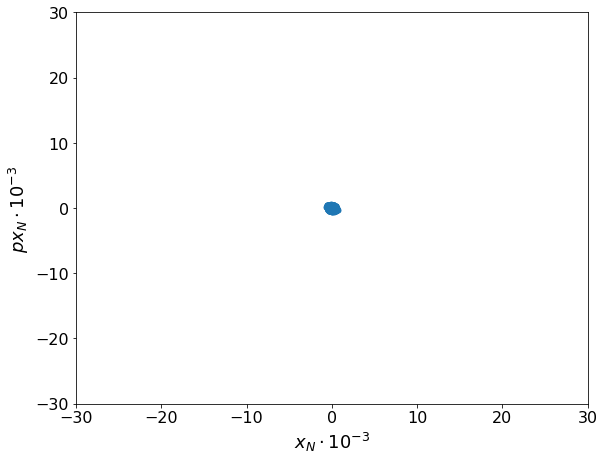

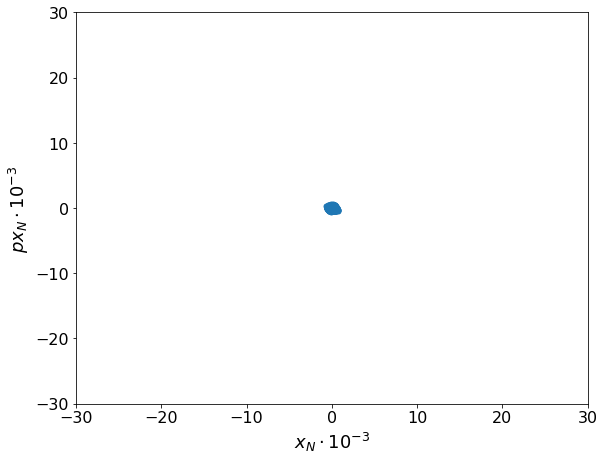

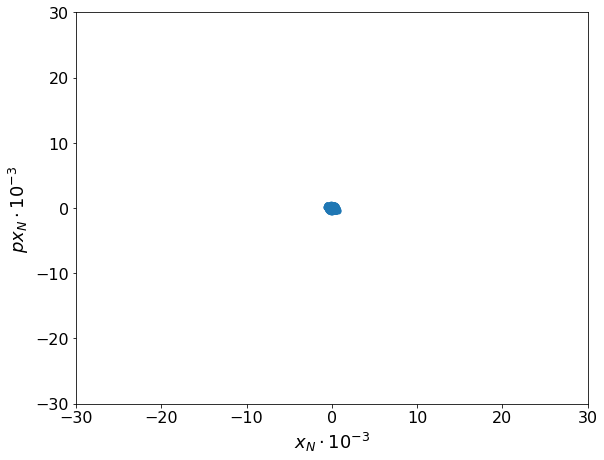

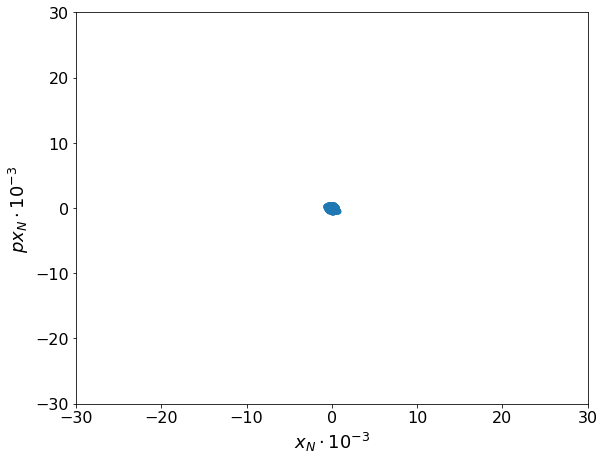

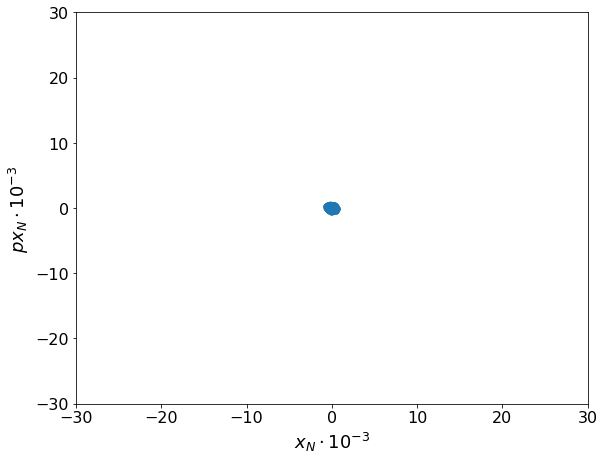

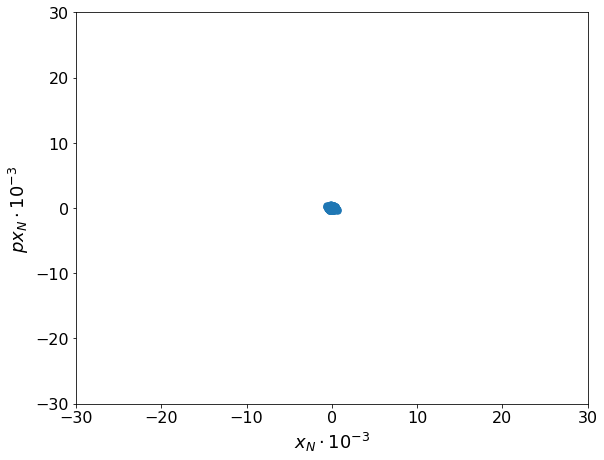

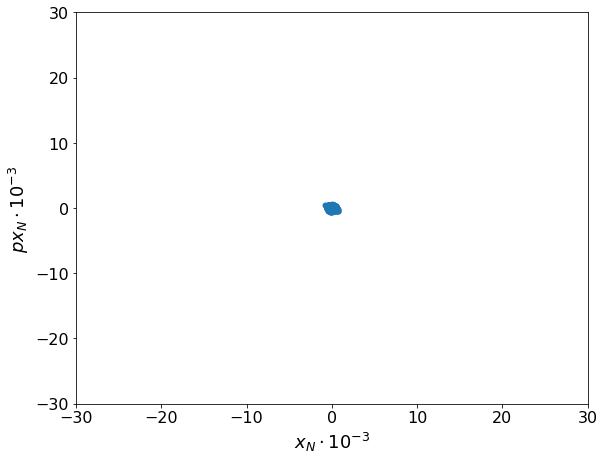

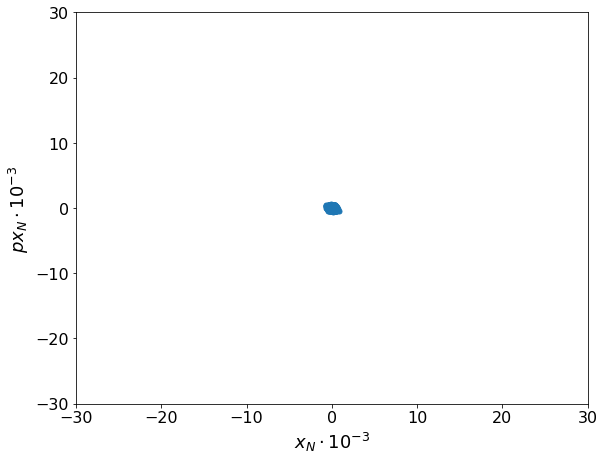

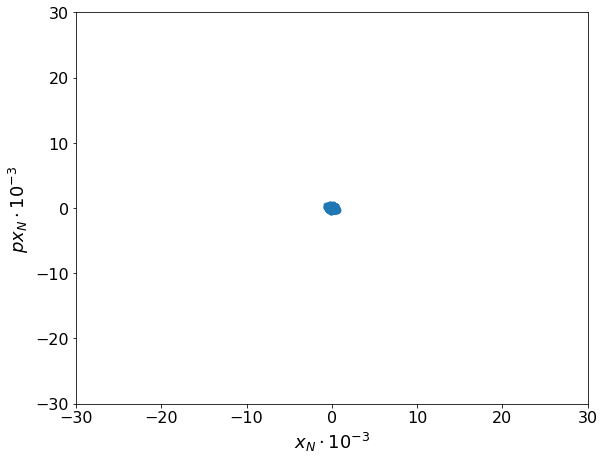

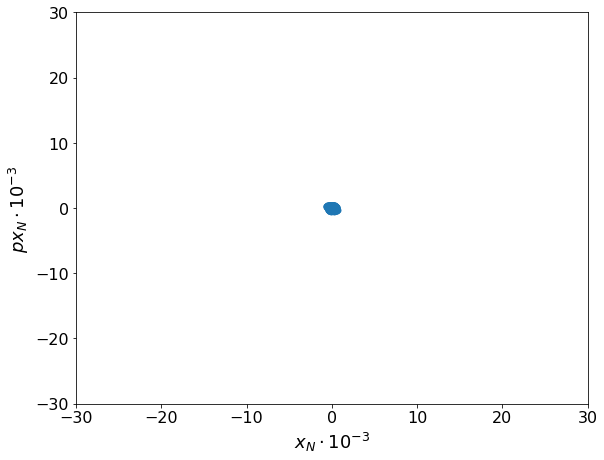

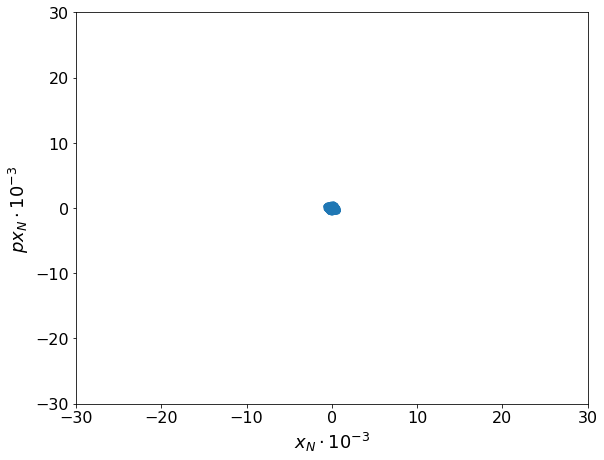

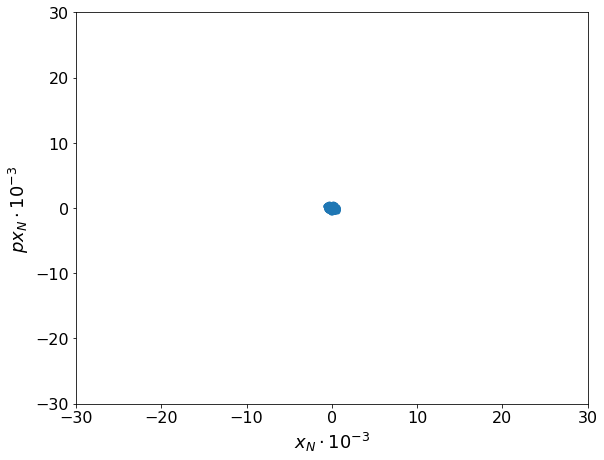

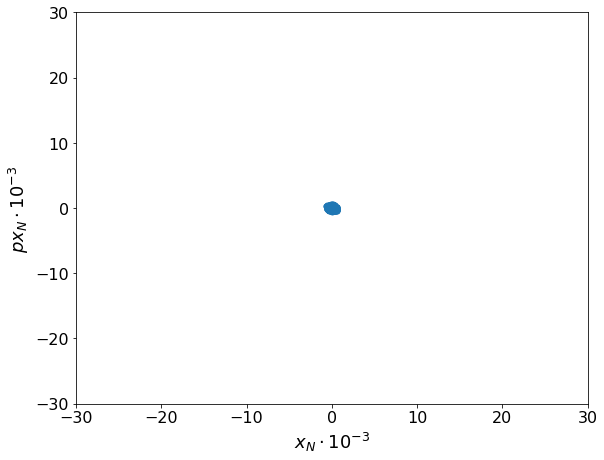

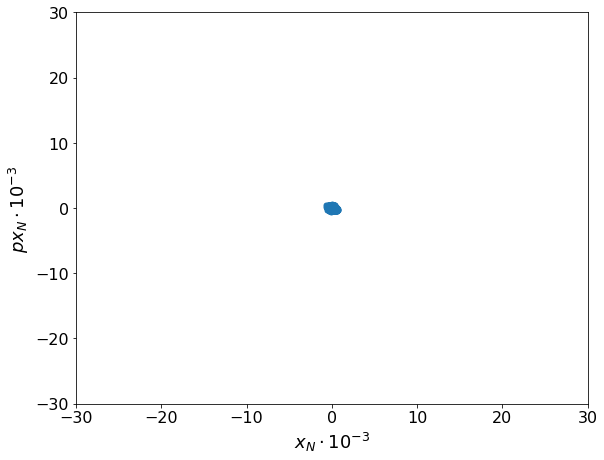

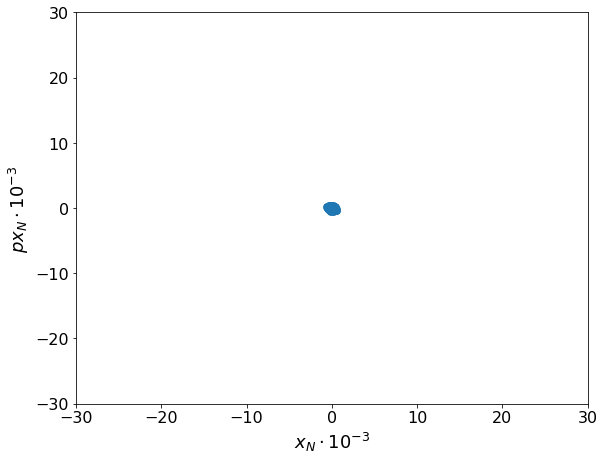

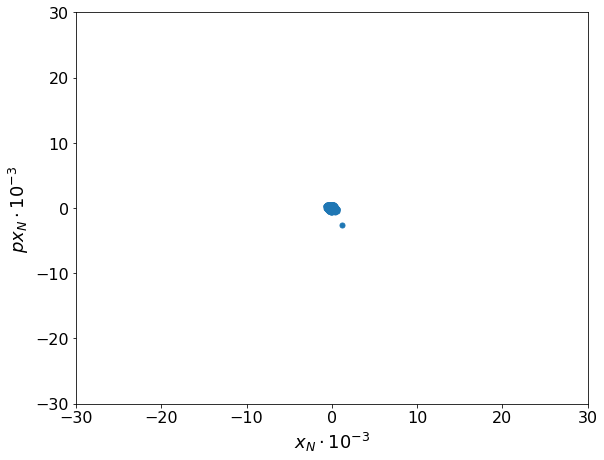

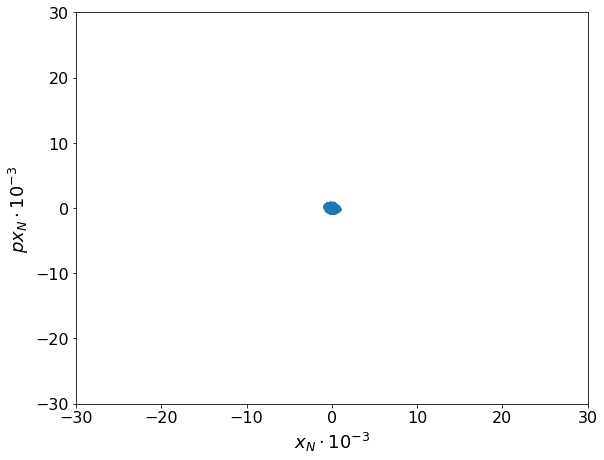

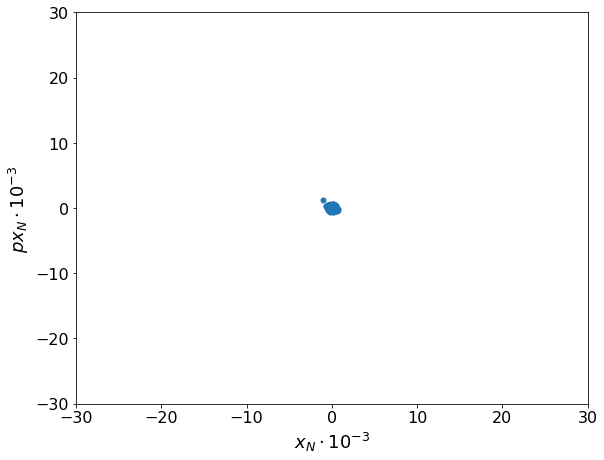

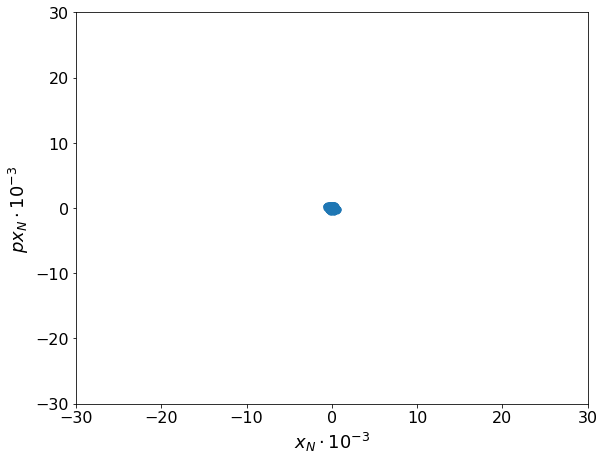

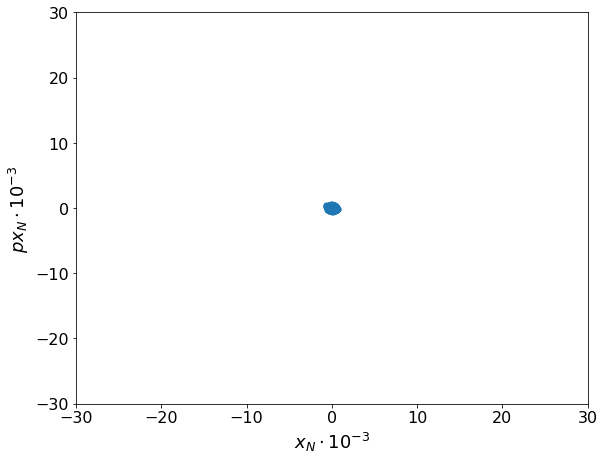

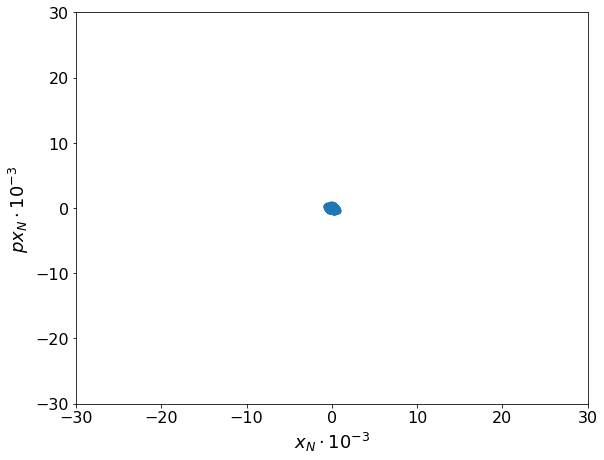

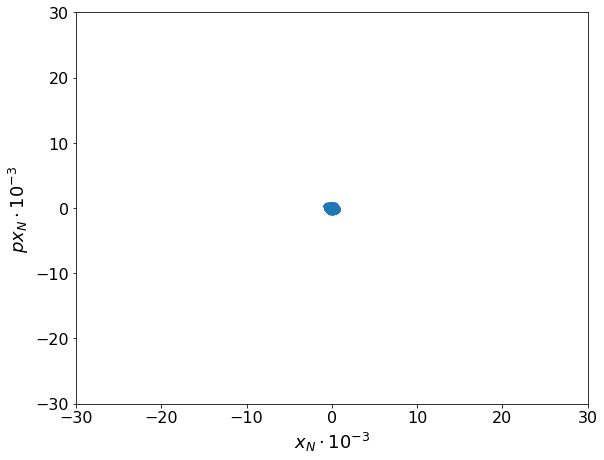

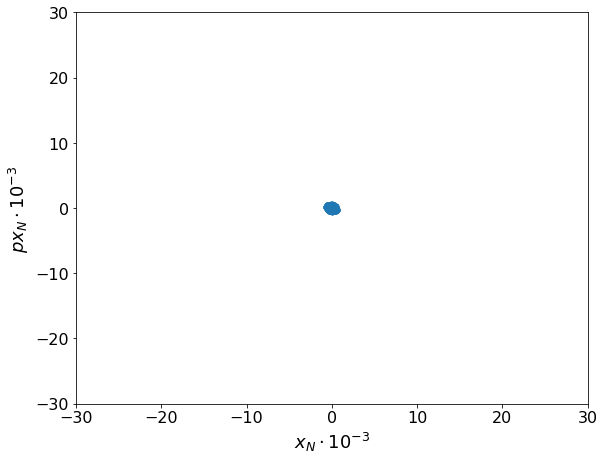

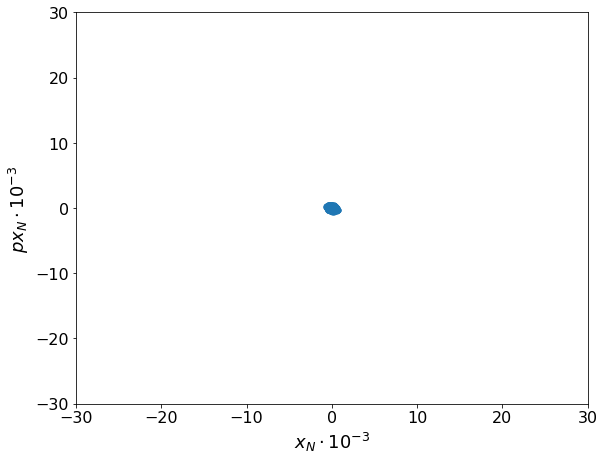

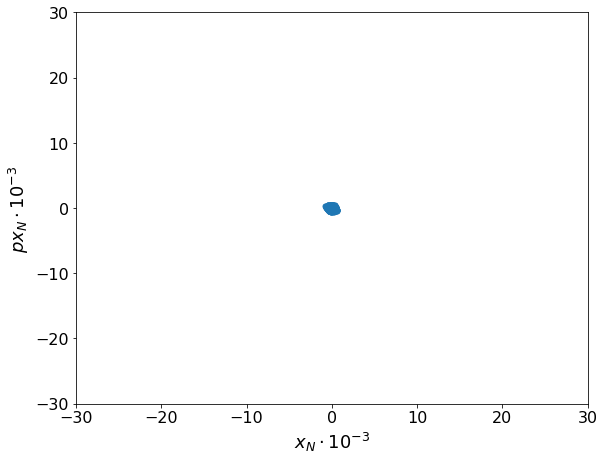

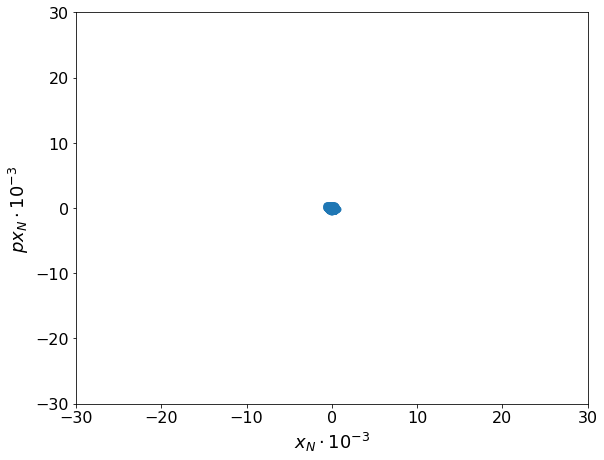

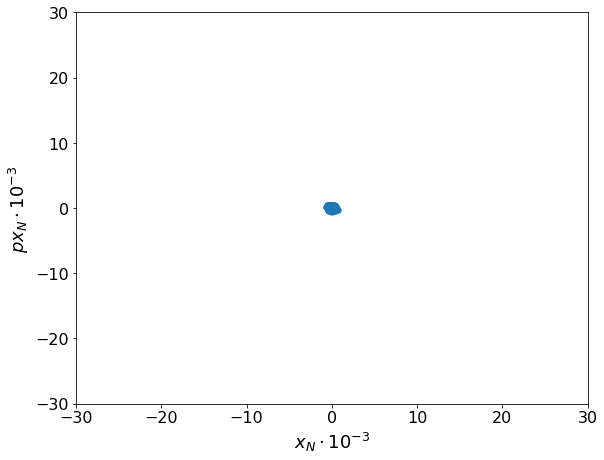

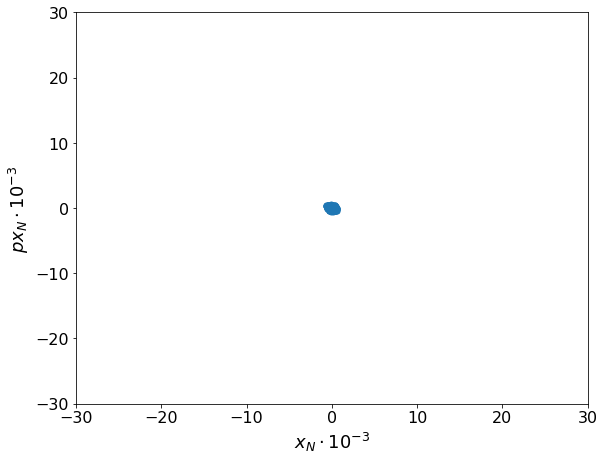

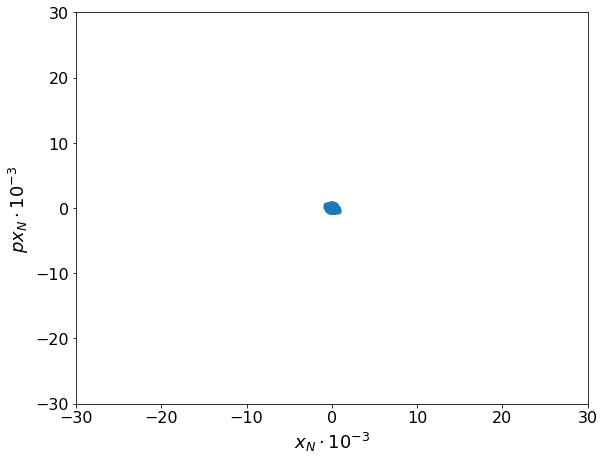

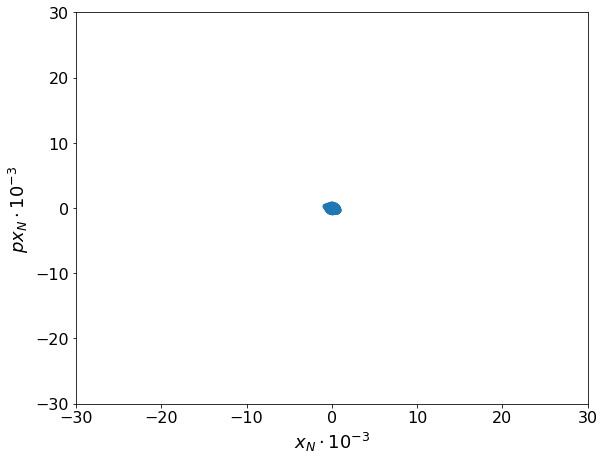

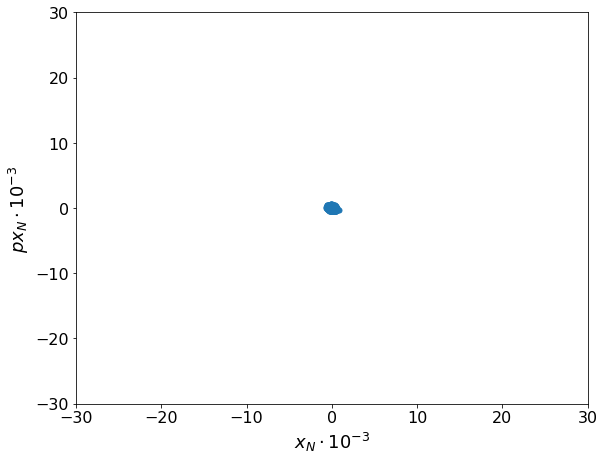

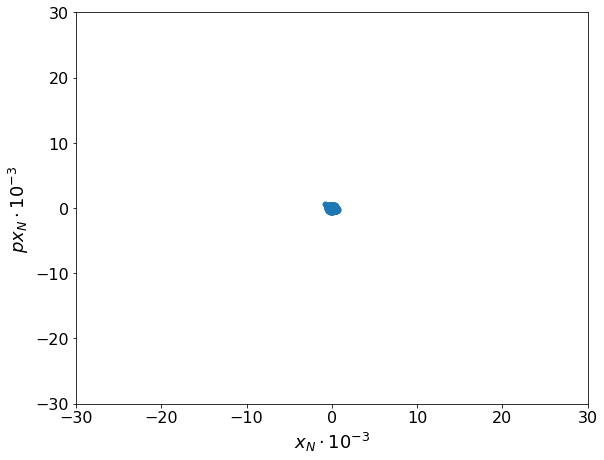

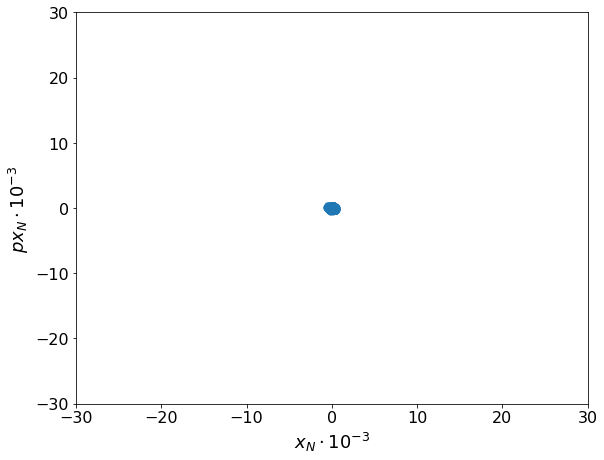

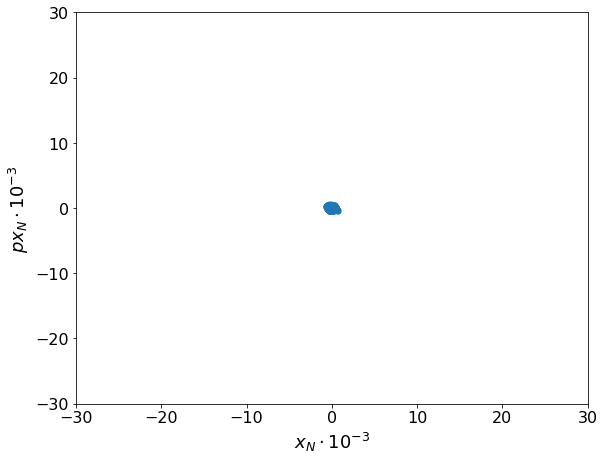

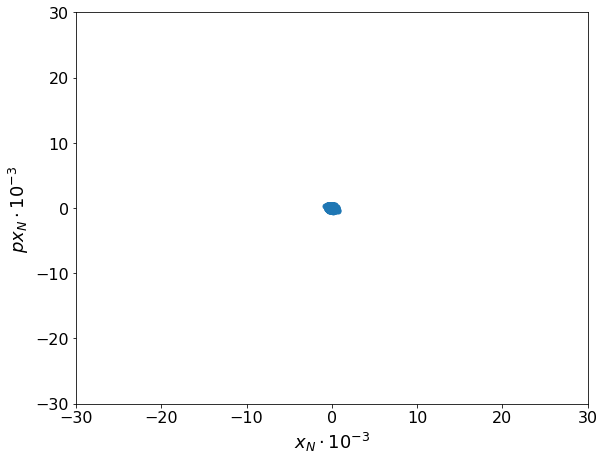

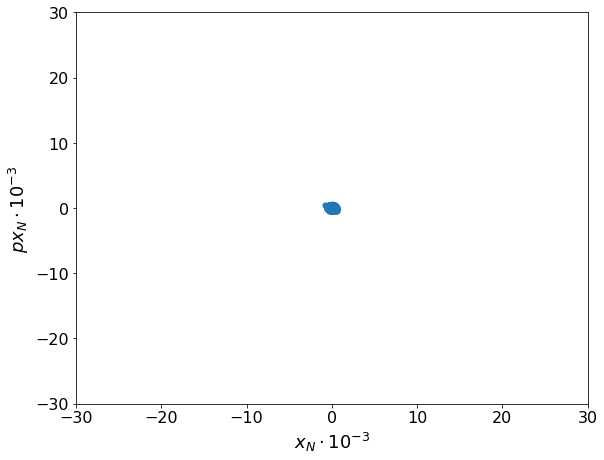

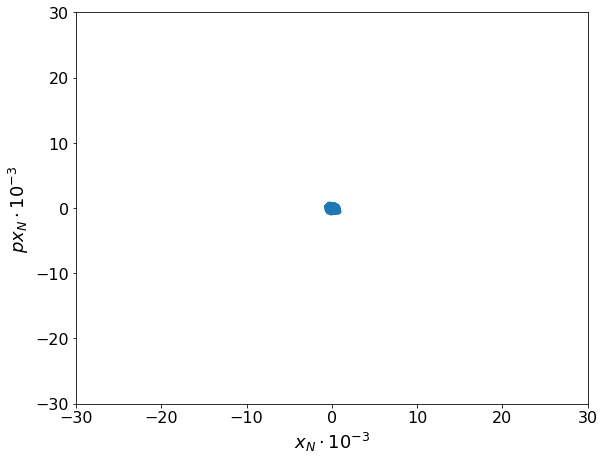

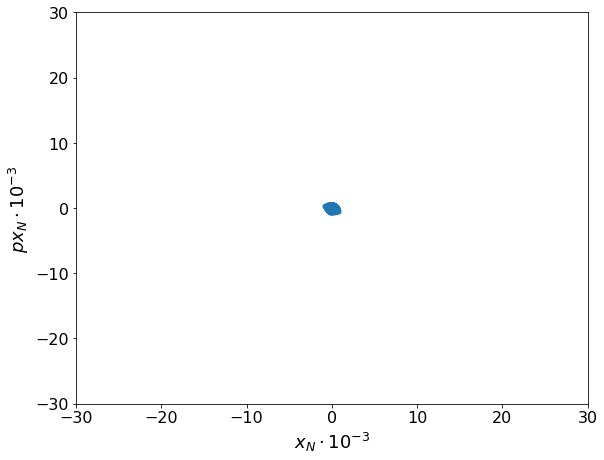

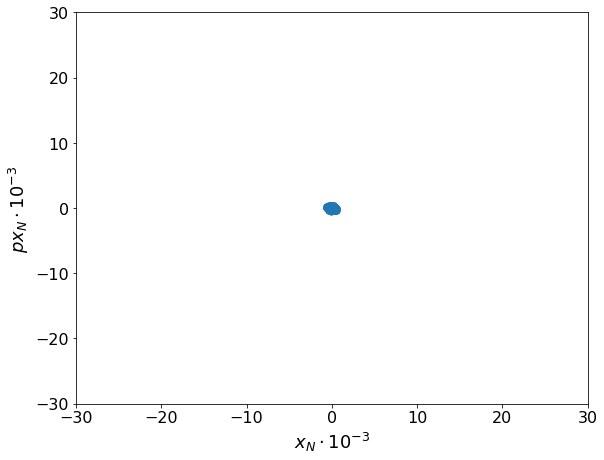

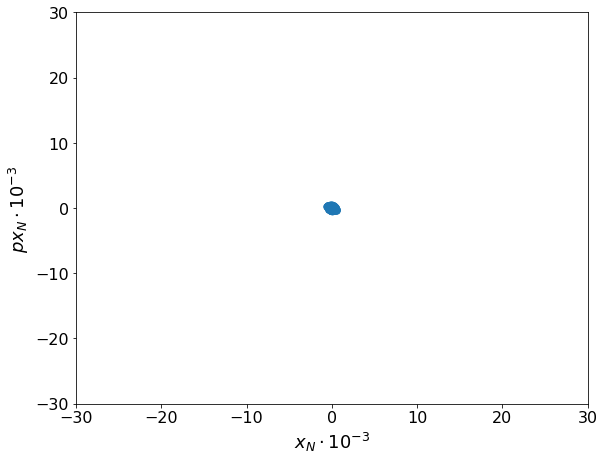

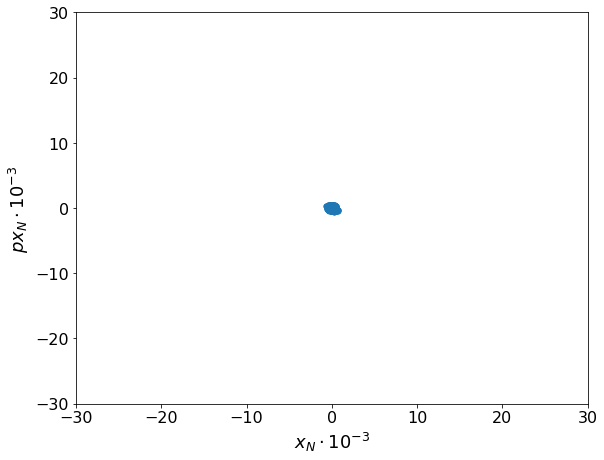

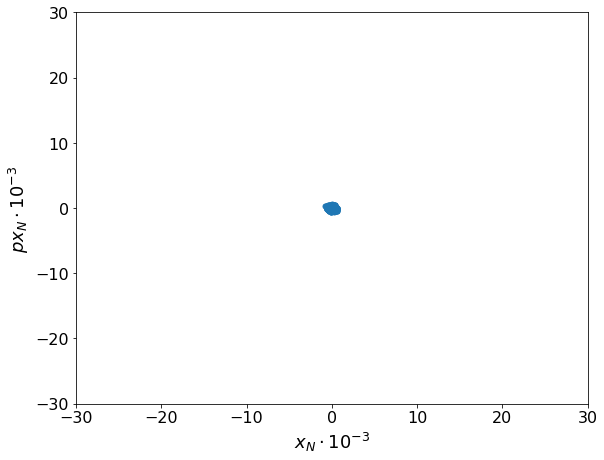

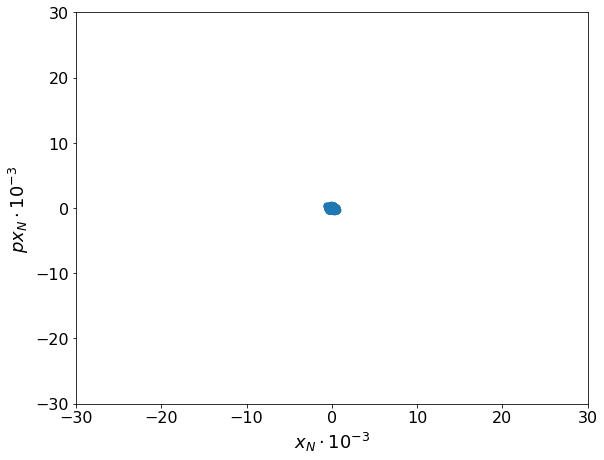

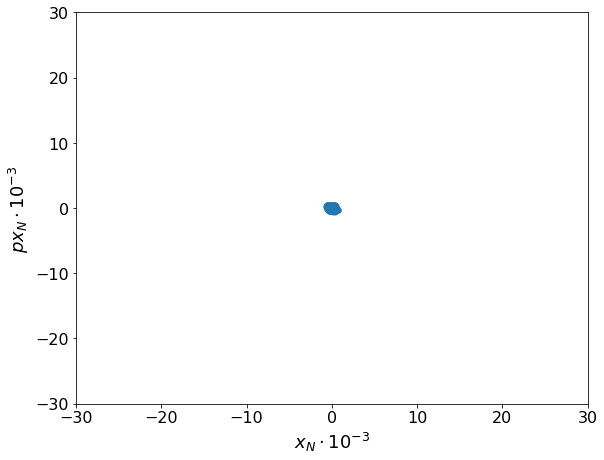

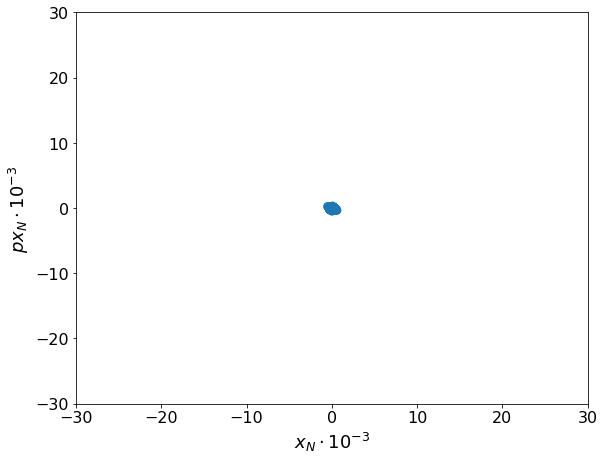

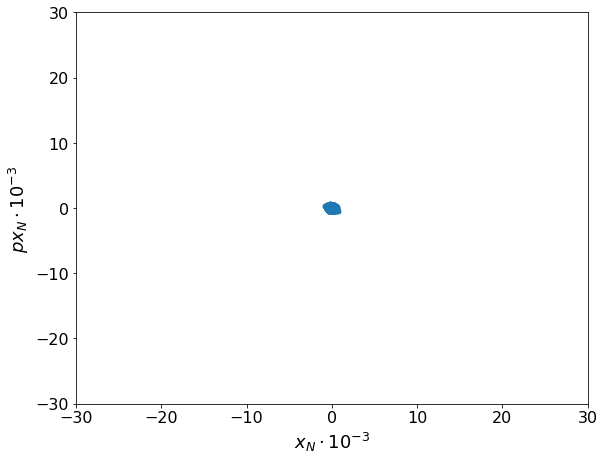

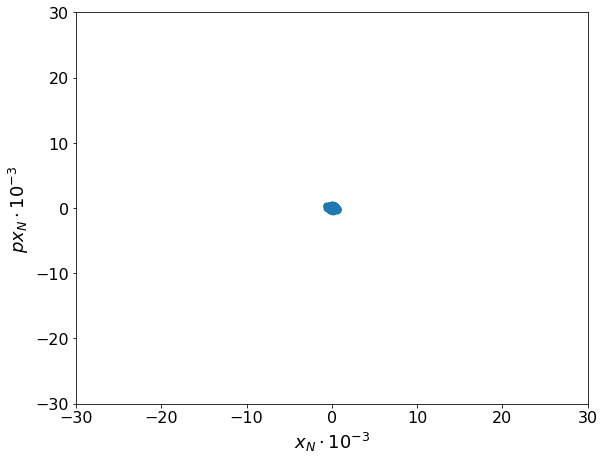

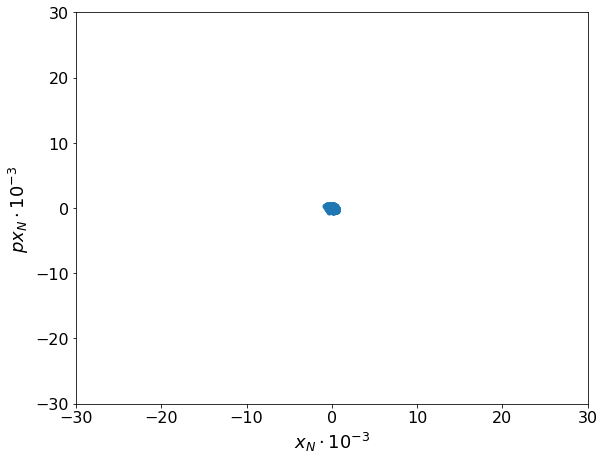

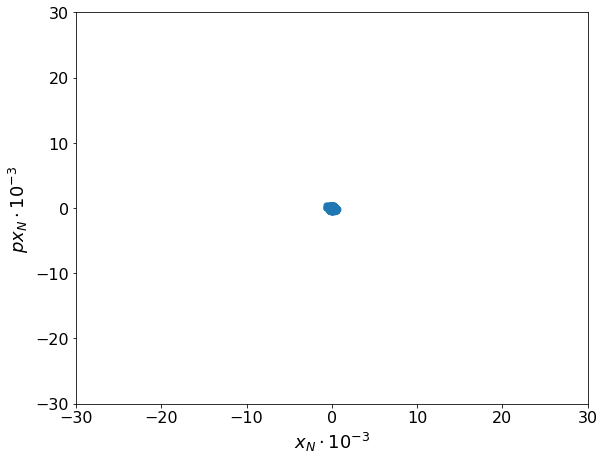

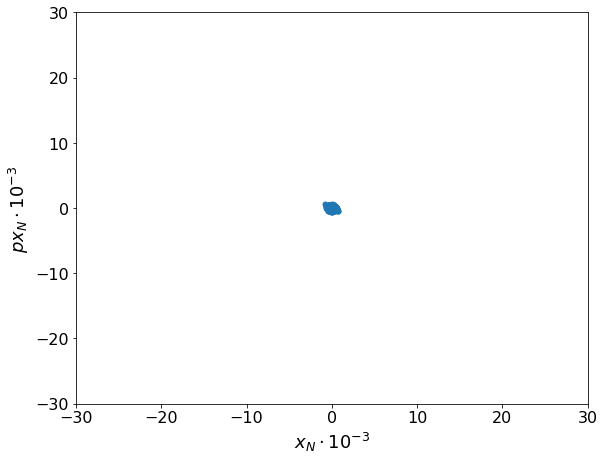

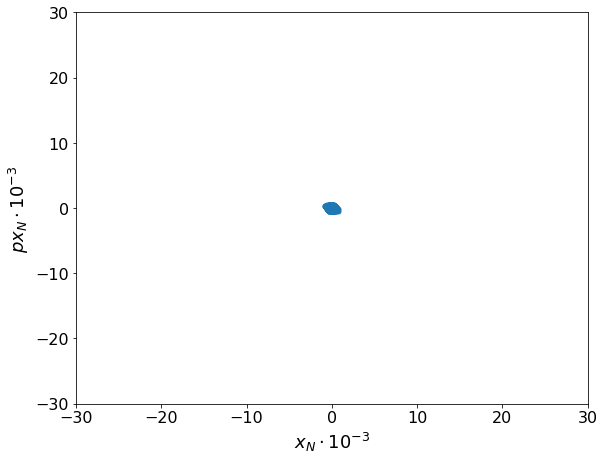

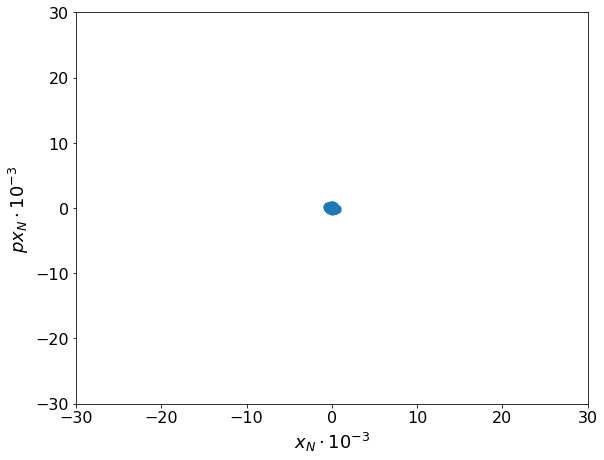

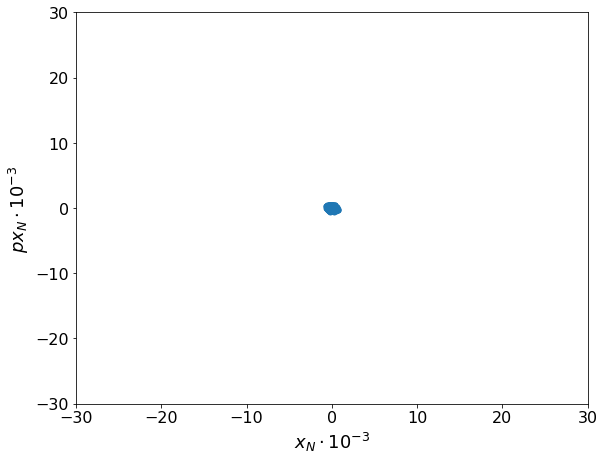

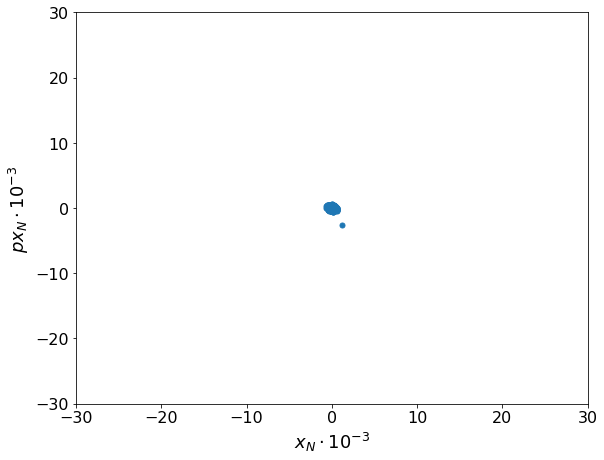

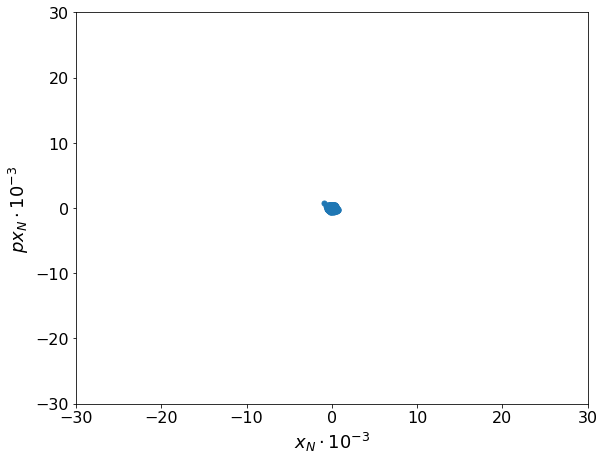

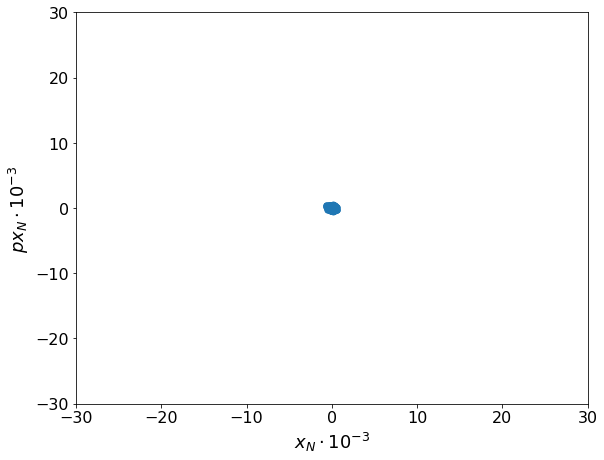

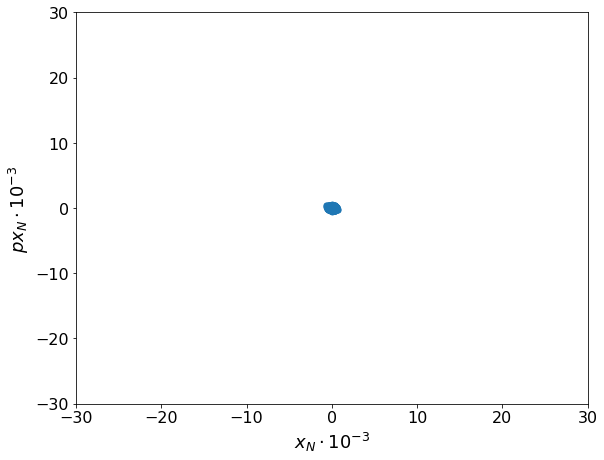

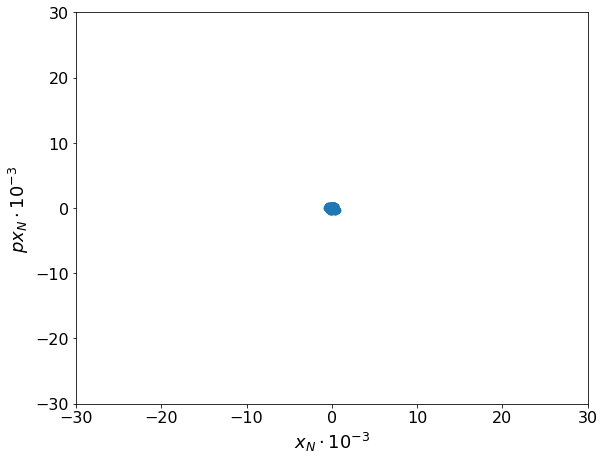

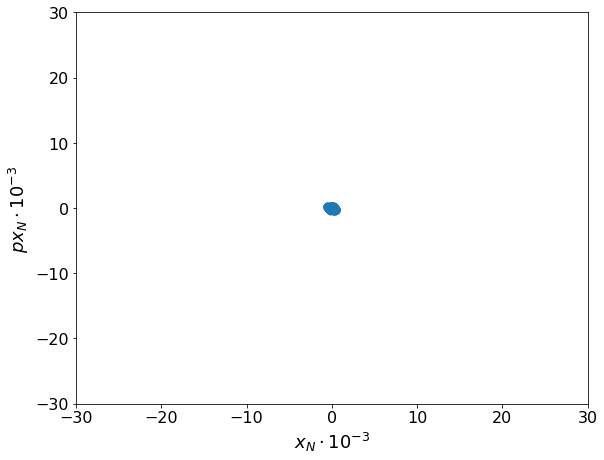

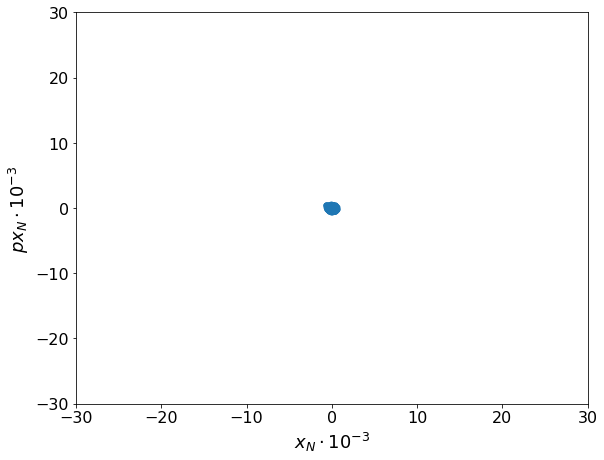

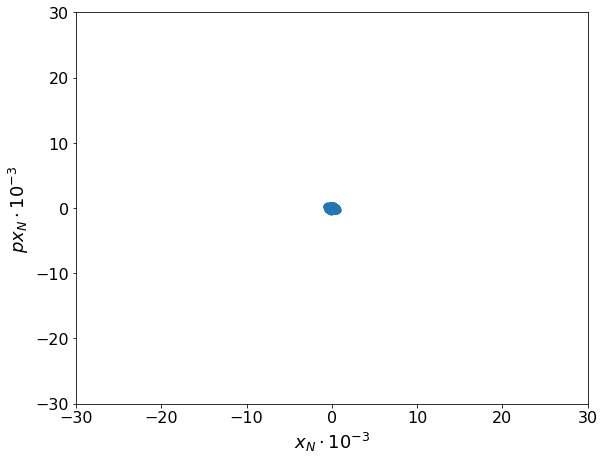

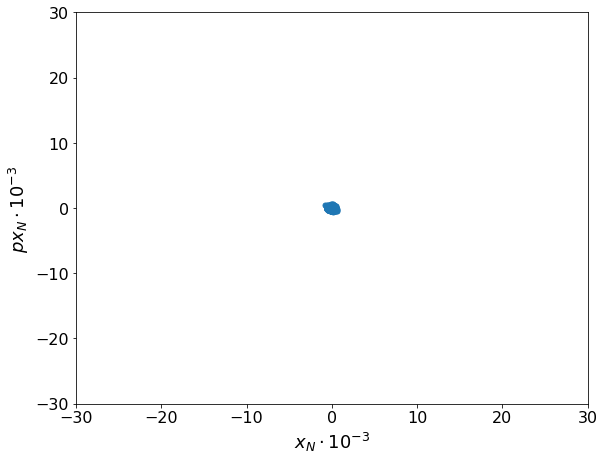

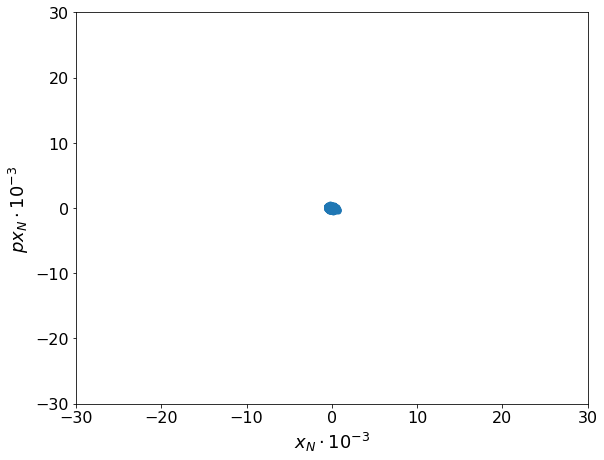

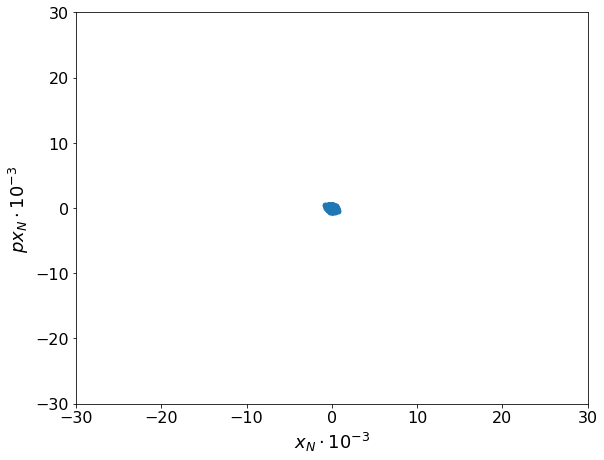

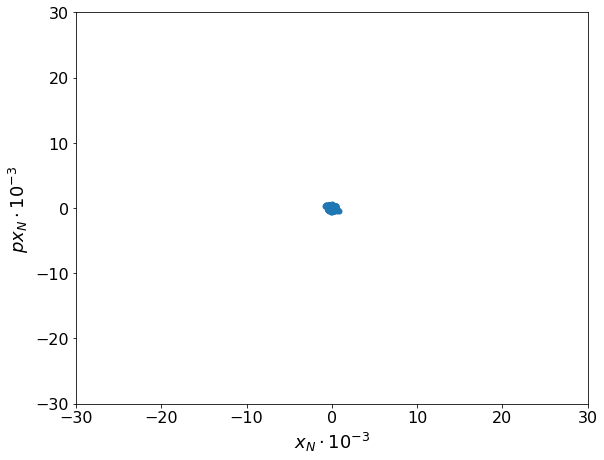

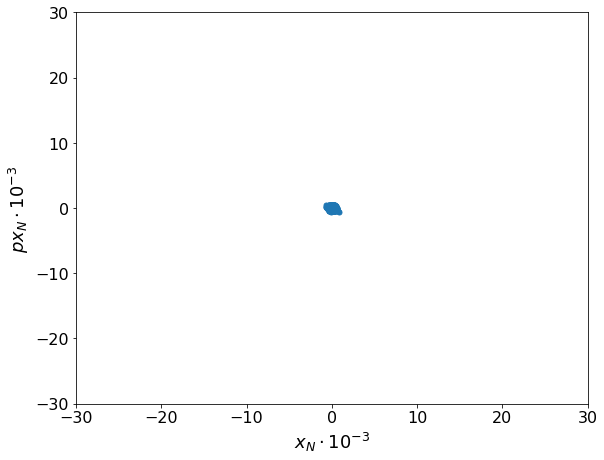

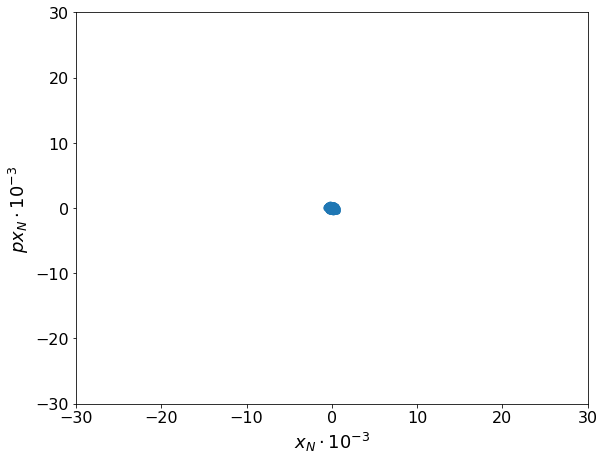

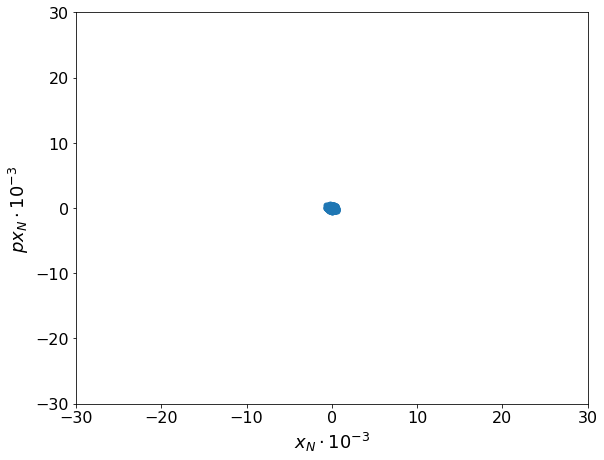

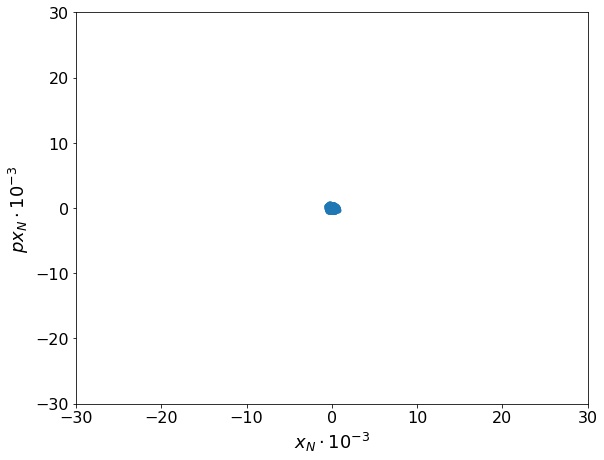

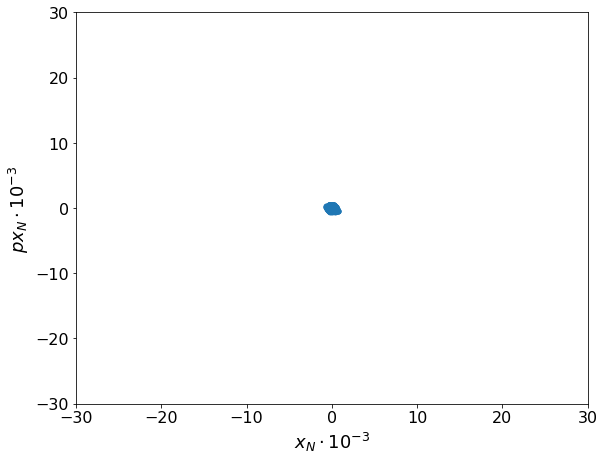

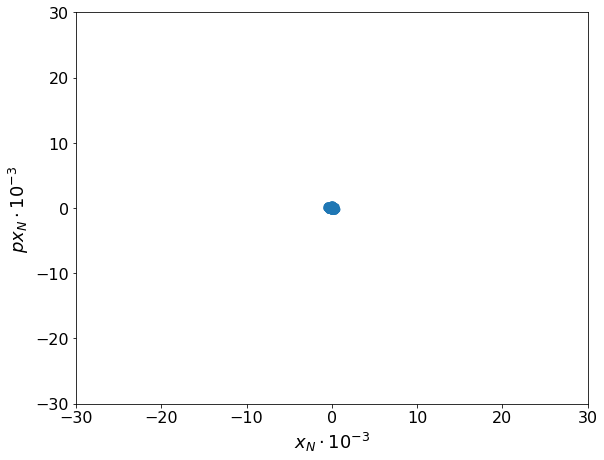

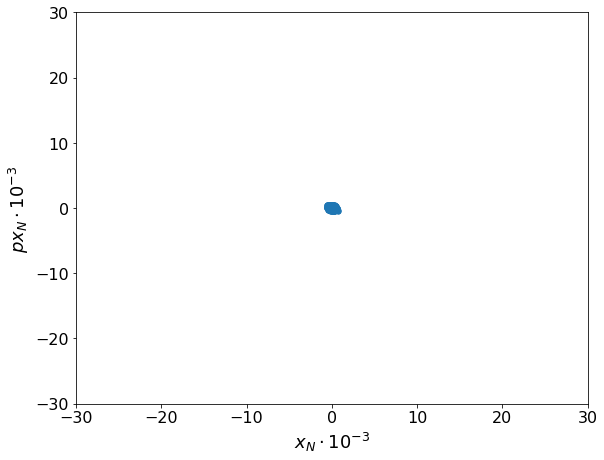

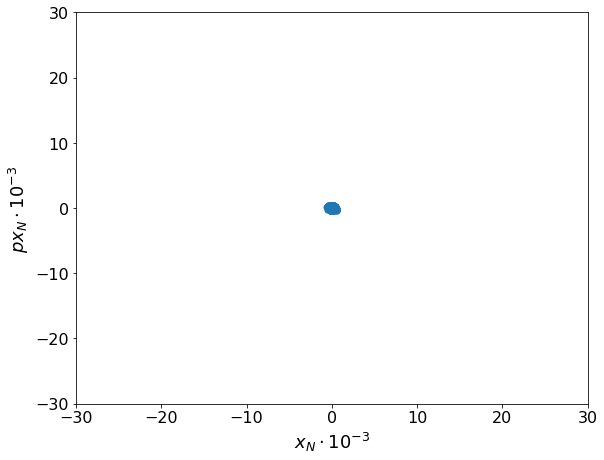

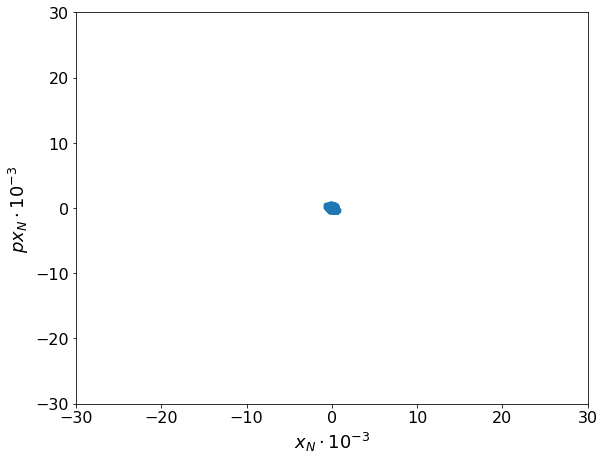

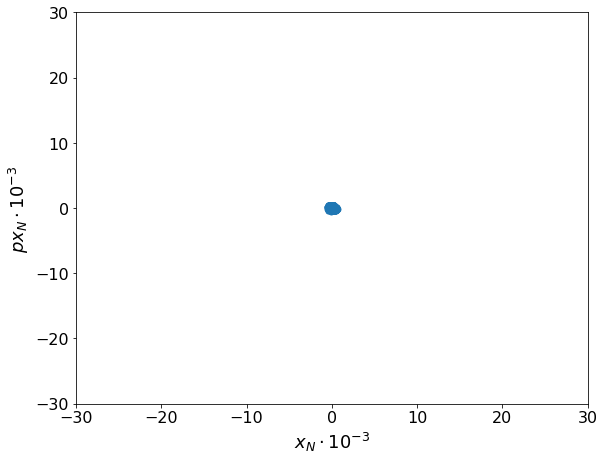

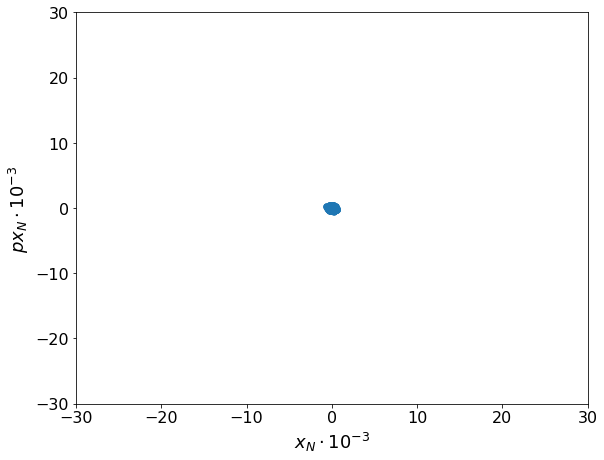

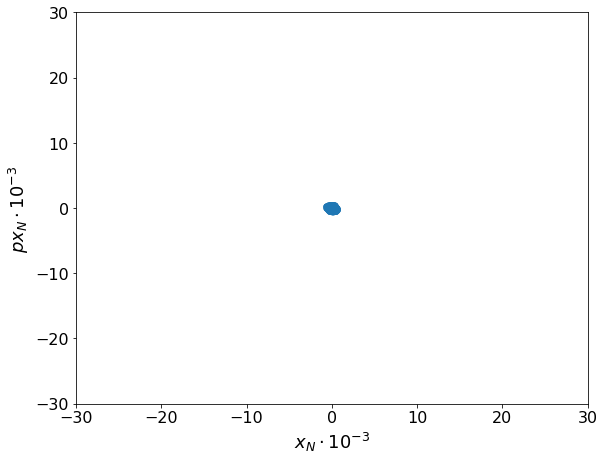

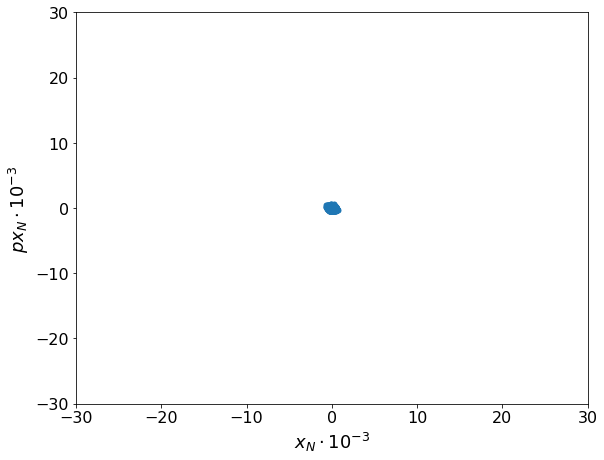

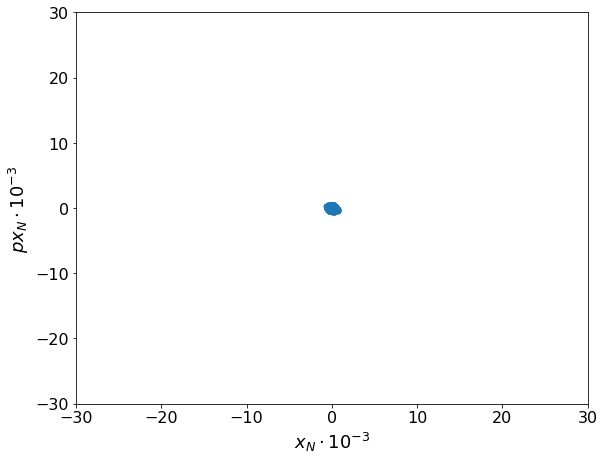

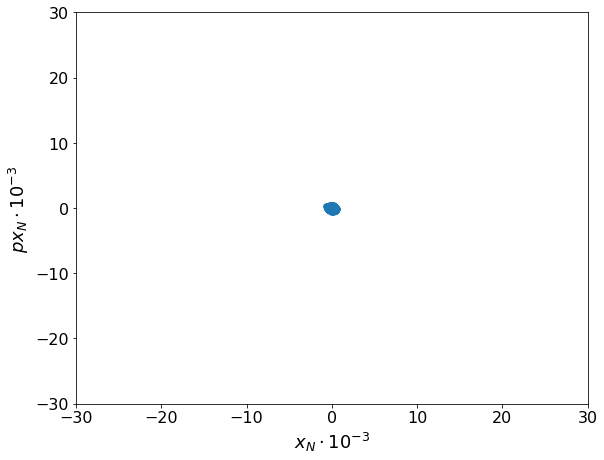

In [6]:
plot_every_turn_flag = True
plot_all_together_flag = False

for turn in range(600,800):
    if plot_every_turn_flag:
        fig, ax = plt.subplots()
    plt.scatter(df.at[turn,'x']*1e3/sqrt(twiss.beta_x), df.at[turn,'px']*1e3*sqrt(twiss.beta_x) )
    plt.xlabel(r'$x_{N}\cdot 10^{-3}$')
    plt.ylabel(r'$px_{N}\cdot 10^{-3}$')
    plt.xlim(-30, 30) #0.9
    plt.ylim(-30,30)
    plt.tight_layout()
    if plot_every_turn_flag:
        plt.savefig('./figures/aperture_3cm/phase_space_{}.png'.format(turn))
    

if plot_all_together_flag:
    plt.title('Qx=0.775, k3_int=5852.61, g=0.2, '+r'$\Delta = 1.0$'+', 15000 particles')
    plt.tight_layout()
    plt.savefig('./figures/phase_space_{}_up_to600turns.png'.format(file_name))